In [1]:
%matplotlib inline

import matplotlib.pyplot as plt 
import numpy as np
from dataclasses import dataclass
from tqdm import tqdm
import jax
import jax.numpy as jnp
from jax import grad, jit, vmap
import utils

In [2]:
#setups
config = utils.config()
config.init = 200.0
config.iter_num = 1000
config.sample_num = 500
config.lr_large = 0.001
config.lr_small = 0.000001
config.rho = 1.0
#以下で関数の形状を調整する
config.m = 0.1
config.p = 100.0

config

config(init=200.0, iter_num=1000, sample_num=500, lr_large=0.01, lr_small=1e-05, rho=1.0, m=0.1, p=100.0)

/var/folders/42/_8jtb5594rddnjmwctnf_xzm0000gn/T/ipykernel_66561/2940397141.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


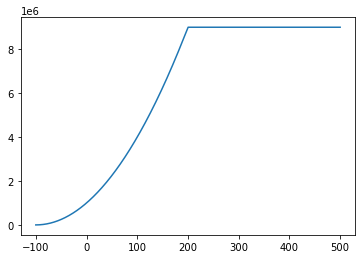

In [3]:
x = np.linspace(-100, 500, 1000)
z1 = utils.c(x)

fig, ax = plt.subplots() 
ax.plot(x, z1)
#plt.ylim(-1000,4000)
fig.show()

/var/folders/42/_8jtb5594rddnjmwctnf_xzm0000gn/T/ipykernel_66561/2789927107.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


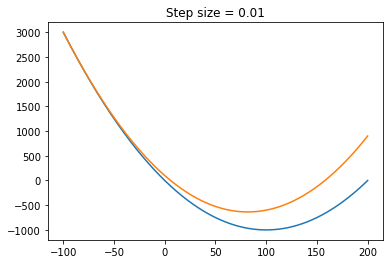

In [4]:
eta = config.lr_large
sigma = 1

"""
def g(x, p, m, h):
    if 0 < x or x < p:
        return -1 * m * x
    else
        return 

def c(x):
    return x**2

def f(x, y, p, m, h):
    return g(x, p, m, h) + c(x) * y**2
"""
    
def smoothed_f(x, m, p):
    return utils.objective(x, config) + eta**2 * sigma**2 * utils.c(x)

x = np.linspace(-100, 200, 1000)
z1 = utils.objective(x, config)
z2 = smoothed_f(x, config.m, config.p)

fig, ax = plt.subplots() 
ax.plot(x, z1)
ax.plot(x, z2)
plt.title('Step size = 0.01')
#plt.xlim(-100,50)
#plt.ylim(-1000,4000)
fig.show()

In [ ]:
sgd_l_x, sgd_l_y = utils.optimize(config, 'SGD_large')
sgd_s_x, sgd_s_y = utils.optimize(config, 'SGD_small')

ave_sgd_l_x, ave_sgd_l_y = utils.optimize(config, 'Ave_SGD_large')
ave_sgd_s_x, ave_sgd_s_y = utils.optimize(config, 'Ave_SGD_small')

  0%|                                                   | 0/500 [00:00<?, ?it/s]/Users/maedashugo/Study/optimizations_plot/20221108/utils.py:33: RuntimeWarning: overflow encountered in double_scalars
  x -= lr * grad_g(x, conf) + grad_c(x) * (y + lr * noise)**2
/Users/maedashugo/Study/optimizations_plot/20221108/utils.py:33: RuntimeWarning: invalid value encountered in double_scalars
  x -= lr * grad_g(x, conf) + grad_c(x) * (y + lr * noise)**2
/Users/maedashugo/Study/optimizations_plot/20221108/utils.py:34: RuntimeWarning: overflow encountered in double_scalars
  y -= lr * grad_y(x, y)*(y + lr * noise)
/Users/maedashugo/Study/optimizations_plot/20221108/utils.py:34: RuntimeWarning: invalid value encountered in double_scalars
  y -= lr * grad_y(x, y)*(y + lr * noise)


0
-0.7217793846188711
1262.8786859533764
1262.8859037472225
0.3582053981286327
-2.2482591438073773e+25
-2.2482591438073773e+25
-0.0859225148421631
4.0468439762618415e+30
4.0468439762618415e+30
0.7242070480546323
-7.664073418502632e+162
-7.664073418502632e+162
0.1407239765349381
1.3795255512570553e+168
1.3795255512570553e+168
-0.23161268655770062
-2.4831321970071874e+173
-2.4831321970071874e+173
0.4546832593412864
4.469613123290967e+178
4.469613123290967e+178
0.31487122546901003
-8.045258925792508e+183
-8.045258925792508e+183
-0.20418820611290853
1.4481385613837257e+189
1.4481385613837257e+189
-0.3775820369246445
-2.6066349291050924e+194
-2.6066349291050924e+194
0.16979882289112247
4.691916806039875e+199
4.691916806039875e+199
-0.6666990421249249
-8.445403331703715e+204
-8.445403331703715e+204
-0.21186263977856115
1.5201641543033367e+210
1.5201641543033367e+210
-0.020174295534106615
-2.7362802761044633e+215
-2.7362802761044633e+215
-0.2621191861988999
4.925277134185273e+220
4.9252771341

  0%|                                           | 1/500 [00:00<02:23,  3.48it/s]


nan
-0.0641383215565094
nan
nan
0.14630485171693214
nan
nan
-0.647149120669549
nan
nan
-0.6411661939673684
nan
nan
0.3629731278975385
nan
nan
-0.6127019707387519
nan
nan
0.10522424412348103
nan
nan
0.6996187496564261
nan
nan
0.5376807012161428
nan
nan
0.10128397353433663
nan
nan
-0.6393929803920122
nan
nan
0.7336838209105466
nan
nan
0.6264803085820208
nan
nan
0.5411608565608619
nan
nan
-0.030949736417925422
nan
nan
-0.7486703014275499
nan
nan
-0.21579909695990854
nan
nan
-0.09136457087730712
nan
nan
-0.38334657685560636
nan
nan
-0.7356809908819573
nan
nan
-0.7878716494441349
nan
nan
-0.7614226998647062
nan
nan
0.4142954575054413
nan
nan
-0.5210442581378738
nan
nan
0.38068184028712476
nan
nan
-0.729198753897022
nan
nan
0.08950100897471423
nan
nan
0.35031240353112225
nan
nan
-0.5926618578999234
nan
nan
-0.46221761434588127
nan
nan
-0.0327200626401913
nan
nan
-0.3985888352452602
nan
nan
0.608314054624265
nan
nan
-0.4643912209947587
nan
nan
-0.2813793382897089
nan
nan
0.19897823502362702


  0%|▏                                          | 2/500 [00:00<02:20,  3.55it/s]

-0.10054696270650326
nan
nan
0.12424000337031026
nan
nan
-0.3276788545706493
nan
nan
0.26844481115096175
nan
nan
0.4289110911247116
nan
nan
0.6603577390512738
nan
nan
0.2361552487107769
nan
nan
0.5972746365425788
nan
nan
-0.5186659145344716
nan
nan
0.47799371812918157
nan
nan
-0.021287696692047043
nan
nan
-0.029384300397126497
nan
nan
0.6465805518620155
nan
nan
-0.009259372340635964
nan
nan
0.023397684824652033
nan
nan
0.19549108445625213
nan
nan
-0.23513672361883683
nan
nan
0.14267225713174483
nan
nan
0.7225639210086761
nan
nan
0.21680940794910716
nan
nan
0.6737360653601236
nan
nan
-0.5051298068236826
nan
nan
0.5175594020064207
nan
nan
-0.36542113302342916
nan
nan
0.6476975165586287
nan
nan
-0.01667759747833202
nan
nan
0.6517291248749265
nan
nan
0.5169671807592646
nan
nan
-0.08246431128781105
nan
nan
0.3720247366183861
nan
nan
-0.799351644254789
nan
nan
0.5025295100807193
nan
nan
-0.770244010820958
nan
nan
0.3773771942486029
nan
nan
0.5250498672825351
nan
nan
0.6192109069573988
nan
na

  1%|▎                                          | 3/500 [00:00<02:18,  3.58it/s]


nan
0.4809970713735709
nan
nan
0.15511480473112763
nan
nan
0.1690374968131499
nan
nan
-0.16274615618279586
nan
nan
0.6354574876403265
nan
nan
0.13031651633162086
nan
nan
0.7415872455592455
nan
nan
-0.5613205672741043
nan
nan
0.04114057304041339
nan
nan
0.5440684780696291
nan
nan
-0.4295583779674237
nan
nan
0.6699781261490418
nan
nan
0.6719218395419964
nan
nan
-0.19374352697250308
nan
nan
0.056022340563438
nan
nan
-0.037989060359807605
nan
nan
0.7738353445625354
nan
nan
0.6287479461189855
nan
nan
-0.42252829063960196
nan
nan
-0.2756584343826905
nan
nan
0.12253326242137721
nan
nan
-0.25693185360424947
nan
nan
0.41268690197462626
nan
nan
-0.7048522995727344
nan
nan
0.36499975404017704
nan
nan
0.7424829600329069
nan
nan
0.08979221556537312
nan
nan
0.39038283929059986
nan
nan
0.15979494283908713
nan
nan
0.5216616175491684
nan
nan
0.7679735669254486
nan
nan
0.01697521973340024
nan
nan
0.6244358096952672
nan
nan
0.06288590801664516
nan
nan
-0.19933110983230692
nan
nan
0.059866993168939155
na

  1%|▎                                          | 4/500 [00:01<02:16,  3.64it/s]

-0.23841373506627336
nan
nan
-0.6191352122798904
nan
nan
0.7645705981072567
nan
nan
0.2977873307877399
nan
nan
0.6941182715161855
nan
nan
0.0037103517566478674
nan
nan
0.009133585066121875
nan
nan
0.1581047810246039
nan
nan
0.6370788995507226
nan
nan
-0.7298538272538142
nan
nan
-0.148715017475997
nan
nan
-0.16311708766753005
nan
nan
-0.13155583826849143
nan
nan
0.7838392918790295
nan
nan
0.710485897927709
nan
nan
0.5490447365609168
nan
nan
0.08299309202140517
nan
nan
-0.7211826951221574
nan
nan
-0.7982769190728585
nan
nan
0.7373750274467348
nan
nan
0.17308151626604396
nan
nan
-0.17705513788420896
nan
nan
-0.16067882668906394
nan
nan
0.31035028617437543
nan
nan
-0.03200407373237884
nan
nan
0.1401160614618478
nan
nan
0.03000033804947151
nan
nan
-0.3465255602217065
nan
nan
0.06024729578721928
nan
nan
-0.7845069138981731
nan
nan
-0.47193683303521294
nan
nan
0.11347620690815781
nan
nan
-0.4706505708817895
nan
nan
-0.07015267551193514
nan
nan
0.540671075607755
nan
nan
0.06126715971916213
nan

/Users/maedashugo/Study/optimizations_plot/20221108/utils.py:13: RuntimeWarning: overflow encountered in double_scalars
  return np.where(x<200, 100*(x+100)**2, 100*(200+100)**2)



nan
nan
0.430355161131965
nan
nan
0.42090828450354256
nan
nan
0.6394215206750928
nan
nan
0.5988556089775202
nan
nan
-0.7327748531043519
nan
nan
0.478501891343049
nan
nan
0.3014559976458793
nan
nan
0.11579673198898527
nan
nan
-0.28644772798545176
nan
nan
0.4402774408141456
nan
nan
-0.03015811521276142
nan
nan
0.202348553226536
nan
nan
-0.5378131924103755
nan
nan
0.41672489177334526
nan
nan
-0.280069785125389
nan
nan
0.2504075298360395
nan
nan
-0.3861167057973104
nan
nan
0.17657153108616727
nan
nan
0.2563328942097421
nan
nan
0.5956430896148964
nan
nan
-0.17787877322517165
nan
nan
-0.15742638862675928
nan
nan
-0.7284704084455145
nan
nan
0.6267540175096502
nan
nan
-0.6873628396047654
nan
nan
-0.04565859734254527
nan
nan
-0.3689472901770673
nan
nan
0.7507512227969363
nan
nan
-0.05416790486241237
nan
nan
-0.4431797385295914
nan
nan
0.48184997412927316
nan
nan
-0.4554289525738076
nan
nan
-0.28435759092565593
nan
nan
-0.654361830800281
nan
nan
-0.5248790684099331
nan
nan
0.4965579662522013
na

  1%|▍                                          | 5/500 [00:01<02:15,  3.66it/s]

nan
nan
0.35408631626438364
nan
nan
-0.17423601301731786
nan
nan
-0.7861346609085624
nan
nan
-0.4063651787271392
nan
nan
0.11202353598432513
nan
nan
0.23710503103963276
nan
nan
0.6281959145528069
nan
nan
-0.169640287772695
nan
nan
-0.46432581149686797
nan
nan
-0.1717491796089542
nan
nan
0.7972908551635639
nan
nan
0.198281386638336
nan
nan
-0.6288150368456867
nan
nan
-0.6947624949420108
nan
nan
0.5045737034291525
nan
nan
-0.06437442005801586
nan
nan
0.4690782860982573
nan
nan
0.14834878167211532
nan
nan
-0.3535712776824296
nan
nan
0.05256218425313506
nan
nan
-0.15836959065887868
nan
nan
0.17370754700279412
nan
0
0.11664538709575255
-203.35479566682272
-203.35596212069368
0.2852573365098154
2.4249529479288754e+21
2.4249529479288754e+21
0.7590426660611821
-4.364891056742496e+26
-4.364891056742496e+26
0.5073933383634872
1.1402018569350585e+143
1.1402018569350585e+143
0.6071994292015331
-2.052351940464536e+148
-2.052351940464536e+148
0.46213051573850805
3.69421296931676e+153
3.6942129693167

/Users/maedashugo/Study/optimizations_plot/20221108/utils.py:33: RuntimeWarning: overflow encountered in multiply
  x -= lr * grad_g(x, conf) + grad_c(x) * (y + lr * noise)**2
  1%|▌                                          | 6/500 [00:01<02:14,  3.68it/s]


nan
-0.6086074862146695
nan
nan
-0.28751950251322017
nan
nan
0.35603967534452097
nan
nan
-0.13573543725857926
nan
nan
0.6368125680501081
nan
nan
0.24839591936052516
nan
nan
-0.10168412426433537
nan
nan
0.4885579615342378
nan
nan
-0.7676271165660582
nan
nan
0.6816703421651769
nan
nan
-0.5353457056569987
nan
nan
-0.008723523272912459
nan
nan
-0.08497686322063008
nan
nan
-0.18418946099343625
nan
nan
-0.0935873861080534
nan
nan
-0.6130819071811384
nan
nan
-0.1053417952546507
nan
nan
-0.28662326302283336
nan
nan
-0.08803335769628991
nan
nan
0.736902824178288
nan
nan
0.5537622534669374
nan
nan
0.5965194846620886
nan
nan
-0.549545651372458
nan
nan
-0.5374389631337447
nan
nan
0.06775076950552812
nan
nan
-0.7492240668837143
nan
nan
-0.5450752258332198
nan
nan
-0.061580273058179105
nan
nan
0.653503326829778
nan
nan
-0.6099080333743025
nan
nan
-0.709946873432217
nan
nan
-0.12877946434697893
nan
nan
-0.6494009506428187
nan
nan
0.32752290584901156
nan
nan
0.3378842732523035
nan
nan
0.6903218277486

  1%|▌                                          | 7/500 [00:01<02:13,  3.69it/s]

-0.24563675543437657
nan
nan
0.11729979466007255
nan
nan
0.39875899636905443
nan
nan
-0.27775787231678833
nan
nan
0.7392345006363508
nan
nan
0.03183178094315409
nan
nan
0.40578069031499864
nan
nan
-0.6012929226799676
nan
nan
-0.72428116774008
nan
nan
0.7288829862027978
nan
nan
-0.11313534219007
nan
nan
-0.3652750266877911
nan
nan
-0.2921256327671916
nan
nan
-0.19926017711972932
nan
nan
-0.02024224643159869
nan
nan
-0.11217535940902988
nan
nan
-0.5659204413555898
nan
nan
-0.28960456752587743
nan
nan
0.49854880575928695
nan
nan
-0.7712735916609825
nan
nan
-0.011869797246825088
nan
nan
-0.5746781342127074
nan
nan
0.44931021909129676
nan
nan
-0.3386702160225589
nan
nan
0.07813016095369463
nan
nan
-0.3401139270641778
nan
nan
0.7584334909031565
nan
nan
-0.4876936361914659
nan
nan
-0.5554372405774134
nan
nan
-0.27299545780301776
nan
nan
0.4464203982494757
nan
nan
-0.731097813133184
nan
nan
0.09881066521821165
nan
nan
-0.29112714265972034
nan
nan
0.5305118371416828
nan
nan
-0.608981535098163
n

  2%|▋                                          | 8/500 [00:02<02:11,  3.74it/s]


nan
0.22997485346874136
nan
nan
-0.5467020094255525
nan
nan
0.09873289468509423
nan
nan
-0.25816249569878646
nan
nan
0.2625854205448169
nan
nan
-0.01451549609540841
nan
nan
0.6437480783870781
nan
nan
-0.2591882276227196
nan
nan
-0.515263618080402
nan
nan
0.17854406679994597
nan
nan
-0.05490422517528231
nan
nan
0.49042721764256236
nan
nan
-0.6955429678844314
nan
nan
0.30759684589489444
nan
nan
-0.7174839981037255
nan
nan
-0.11753855517056451
nan
nan
-0.3291143476534066
nan
nan
-0.7828857334153192
nan
nan
0.5364132899701479
nan
nan
-0.17049728134942033
nan
nan
-0.6144176778008021
nan
nan
-0.728946441976685
nan
nan
-0.7526444371698924
nan
nan
0.024854660902659732
nan
nan
0.5128615532347969
nan
nan
-0.08201555954291724
nan
nan
0.6920478657092262
nan
nan
0.6901094799543389
nan
nan
0.308693203820622
nan
nan
-0.763049886728537
nan
nan
-0.37743397443582816
nan
nan
0.2670743841380304
nan
nan
0.2929888012350757
nan
nan
-0.5006477967623842
nan
nan
0.7987001620650439
nan
nan
0.4505514755532037
na

  2%|▊                                          | 9/500 [00:02<02:10,  3.77it/s]

0.6468457656910362
nan
nan
-0.11601334630946472
nan
nan
0.6624728843226064
nan
nan
0.2751470680421644
nan
nan
-0.12327027603808816
nan
nan
-0.4095022809745237
nan
nan
0.652111695085901
nan
nan
0.6839529538167526
nan
nan
-0.7442887864498327
nan
nan
-0.3448250900539783
nan
nan
0.464694143524366
nan
nan
-0.7900847503535178
nan
nan
-0.41632856551319275
nan
nan
0.2768698415073191
nan
nan
0.6852246463104268
nan
nan
0.6612545002232588
nan
nan
-0.2836841352603587
nan
nan
0.6573729314347534
nan
nan
-0.19479528188688777
nan
nan
-0.15265610413382388
nan
nan
-0.5820031650895334
nan
nan
0.5721485721926767
nan
nan
0.4945082118865539
nan
nan
-0.4591467154244326
nan
nan
-0.6213461276099723
nan
nan
-0.0018465266321550545
nan
nan
-0.21192177453189398
nan
nan
-0.2647191063221566
nan
nan
-0.4474834453908235
nan
nan
0.15352958444762044
nan
nan
0.7935353455713869
nan
nan
-0.17083323248961424
nan
nan
-0.13129781511849092
nan
nan
-0.6891302591696489
nan
nan
-0.29549480883726054
nan
nan
-0.6913287398460469
nan

nan
nan
0.6792017774012437
nan
nan
-0.6221819742343744
nan
nan
0.5346276681448192
nan
nan
0.6571287509780208
nan
nan
-0.5594757168247192
nan
nan
0.1350054200183628
nan
nan
0.1537823720214112
nan
nan
0.5243522494343209
nan
nan
0.18119375051986264
nan
nan
-0.06669524332045676
nan
nan
0.32265010293939744
nan
nan
-0.2629157112182902
nan
nan
0.7105745796438164
nan
nan
-0.20423025697974603
nan
nan
-0.5786689730056456
nan
nan
-0.44203658510768185
nan
nan
-0.6312862921065904
nan
nan
-0.6007750876581579
nan
nan
-0.22101726589337592
nan
nan
0.21856352547464708
nan
nan
0.1955994458882483
nan
nan
0.2295745853528052
nan
nan
-0.15379076275671208
nan
nan
0.06771343079516008
nan
nan
0.40068062096602336
nan
nan
0.22405903006270123
nan
nan
0.14934503122459084
nan
nan
0.18178633170335756
nan
nan
-0.44735465718595135
nan
nan
0.5919946366474103
nan
nan
-0.7172946975154013
nan
nan
-0.19533452121715858
nan
nan
0.5290261571627681
nan
nan
-0.6955392393890494
nan
nan
0.323106279386673
nan
nan
-0.364723113879685

  2%|▊                                         | 10/500 [00:02<02:09,  3.79it/s]

nan
0.7427621503688457
nan
nan
-0.5299628368265472
nan
nan
0.2593513461630094
nan
nan
-0.12808472752539207
nan
nan
0.7734266052399992
nan
nan
-0.0261296492859616
nan
nan
-0.7593526811705893
nan
nan
0.7948724148798294
nan
nan
0.4424786785992968
nan
nan
0.13450678243724265
nan
nan
-0.6190727459388571
nan
nan
-0.07791777936170874
nan
nan
0.6626242223886335
nan
nan
0.03415987410148631
nan
nan
-0.12952285171998348
nan
nan
-0.4578956836260762
nan
nan
0.7794248132648232
nan
nan
0.06498200143857887
nan
nan
-0.19843468988834126
nan
nan
0.7311547417826715
nan
nan
0.3749659626753612
nan
nan
0.1590806759846542
nan
nan
-0.33713662809100153
nan
nan
-0.6805134891404667
nan
nan
-0.2988555084148873
nan
nan
0.7056565811112757
nan
nan
0.01430616535157352
nan
0
-0.3092310184063498
556.6127408212456
556.6158331314297
0.40578172584391603
-3.847034594683943e+23
-3.847034594683943e+23
0.4947446106299415
6.92462380008515e+28
6.92462380008515e+28
0.04752840963484282
-1.1419680581637804e+154
-1.1419680581637804e

  2%|▉                                         | 11/500 [00:02<02:08,  3.80it/s]


nan
nan
0.7073865558148653
nan
nan
0.3639401792237994
nan
nan
-0.18027262816300438
nan
nan
-0.7148844740239264
nan
nan
0.3001983325247052
nan
nan
0.2487834713298822
nan
nan
0.5790361642574094
nan
nan
-0.15033899583072863
nan
nan
0.4769998088101504
nan
nan
0.5034227819540561
nan
nan
0.30384759608578843
nan
nan
-0.6217063421174407
nan
nan
-0.5863091247852673
nan
nan
0.3844842991631907
nan
nan
-0.6943962720828134
nan
nan
-0.12663919519294264
nan
nan
0.12612414493259952
nan
nan
-0.7776031744421479
nan
nan
-0.587804513144634
nan
nan
-0.15406618129013783
nan
nan
0.13539414150177542
nan
nan
-0.15387520456996706
nan
nan
-0.7193567516238627
nan
nan
0.04793513953153621
nan
nan
0.36748991980608303
nan
nan
-0.47165161108800185
nan
nan
-0.4420050073556137
nan
nan
0.66730066106709
nan
nan
-0.46846981507418306
nan
nan
0.5499710000740733
nan
nan
-0.0878796490201232
nan
nan
-0.13739012528428898
nan
nan
-0.12461440359497189
nan
nan
0.2697991596558179
nan
nan
-0.356814051762429
nan
nan
0.013032967289026

  2%|█                                         | 12/500 [00:03<02:08,  3.81it/s]

nan
-0.15606775050267122
nan
nan
-0.6857109201162479
nan
nan
0.04358322860036719
nan
nan
-0.677335583393727
nan
nan
-0.5206879251882727
nan
nan
0.6159981489607262
nan
nan
-0.17328027202306284
nan
nan
0.3597055643079067
nan
nan
0.3468083999002291
nan
nan
0.6772286376743442
nan
nan
-0.444334419198022
nan
nan
-0.2900372689390311
nan
nan
-0.4465005711799004
nan
nan
0.491653990254201
nan
nan
-0.7603573381149817
nan
nan
0.7639689802463698
nan
nan
-0.3022099830947486
nan
nan
0.7967012021696354
nan
nan
0.7964270067804574
nan
nan
0.4674094178012171
nan
nan
-0.201131650411992
nan
nan
-0.10726295200060446
nan
nan
-0.7888010364636756
nan
nan
0.1755827522308737
nan
nan
-0.042037424857210584
nan
nan
-0.4053697012408275
nan
nan
-0.21266526386293982
nan
nan
-0.3162516590773821
nan
nan
0.6450853649812265
nan
nan
-0.19556787441662582
nan
nan
-0.4864450956554974
nan
nan
-0.25159821200584426
nan
nan
0.584514706651372
nan
nan
-0.2389683072060237
nan
nan
0.25740551912882026
nan
nan
0.43714218855531883
nan
n

  3%|█                                         | 13/500 [00:03<02:07,  3.83it/s]


nan
nan
-0.5947101071117358
nan
nan
-0.032812700904145585
nan
nan
0.6632634678432114
nan
nan
0.6577868879394129
nan
nan
-0.7855087732708177
nan
nan
-0.06580957936274619
nan
nan
0.5555370251839662
nan
nan
-0.40244867309622595
nan
nan
0.23251137709186126
nan
nan
-0.2664758265605302
nan
nan
-0.3021658861322388
nan
nan
-0.3583073147332574
nan
nan
-0.29877675986571184
nan
nan
0.32687051621905283
nan
nan
-0.15482263879499653
nan
nan
0.01608118650767487
nan
nan
-0.7806207099551838
nan
nan
0.6330206157418268
nan
nan
-0.5883211040688219
nan
nan
-0.7166484278291918
nan
nan
-0.4586806579162994
nan
nan
0.3726861759844283
nan
nan
-0.3112878152273011
nan
nan
0.6810921449618118
nan
nan
-0.532268851821418
nan
nan
-0.6221069910296854
nan
nan
-0.3246508013749576
nan
nan
0.716996135771831
nan
nan
-0.5357725637969317
nan
nan
-0.40375959857718036
nan
nan
0.29676998211994265
nan
nan
-0.14780385973758553
nan
nan
0.31552011239776123
nan
nan
-0.7145657208159755
nan
nan
0.1793947968007725
nan
nan
0.20824245124

  3%|█▏                                        | 14/500 [00:03<02:06,  3.83it/s]

nan
-0.33822365232958856
nan
nan
-0.6937620064554726
nan
nan
-0.7478471477622283
nan
nan
-0.16246751418026495
nan
nan
0.020488779425133608
nan
nan
0.6512489936553959
nan
nan
0.14131056063704756
nan
nan
0.20744028346493498
nan
nan
0.5964370030312017
nan
nan
0.5722205079784292
nan
nan
-0.6013847679248507
nan
nan
-0.14834599408169957
nan
nan
0.04109629856785127
nan
nan
0.6637789712731433
nan
nan
-0.6125586441412697
nan
nan
0.29935209100462984
nan
nan
0.46878605264569106
nan
nan
0.5471289626764352
nan
nan
0.20217140352337976
nan
nan
-0.6721128680326534
nan
nan
0.5065774445320255
nan
nan
-0.5215550153788433
nan
nan
-0.23747193200957392
nan
nan
-0.5158088610081519
nan
nan
0.24281774977530493
nan
nan
0.26909698290881184
nan
nan
0.2739954176685874
nan
nan
0.2670647906452858
nan
nan
0.3910039168617642
nan
nan
0.3683838372325807
nan
nan
0.1960342062330753
nan
nan
0.2633160930462031
nan
nan
-0.7816369442745297
nan
nan
0.07094493984988014
nan
nan
-0.6808758649774888
nan
nan
-0.5296019378210713
nan

-0.3850883146062552
nan
nan
-0.6465318856089071
nan
nan
0.7661728645934673
nan
nan
0.3516189942610762
nan
nan
0.2465486843643003
nan
nan
0.0843704337282448
nan
nan
0.49461122747029534
nan
nan
-0.5092743346480584
nan
nan
0.3860975361037207
nan
nan
0.7772431897185937
nan
nan
-0.2973419231379378
nan
nan
0.11055245251911182
nan
nan
-0.6617826136433188
nan
nan
-0.2595066825280199
nan
nan
0.06765136026842082
nan
nan
-0.4009344838761562
nan
nan
0.49537619989751835
nan
nan
0.4090630254622301
nan
nan
-0.22383297031679864
nan
nan
0.09600533146198985
nan
nan
-0.1256748752017492
nan
nan
0.32381262934647154
nan
nan
-0.6115294029471404
nan
nan
-0.4761282487645657
nan
nan
0.19661171482331224
nan
nan
-0.02760353322038611
nan
nan
-0.6241023938588294
nan
nan
-0.7131270476808554
nan
nan
-0.43148949088273164
nan
nan
0.5977421632858813
nan
nan
-0.7207666750563022
nan
nan
0.15882114094314925
nan
nan
-0.5417668251164047
nan
nan
0.418284911283233
nan
nan
0.4933027519805309
nan
nan
-0.2206428379391861
nan
nan


  3%|█▎                                        | 15/500 [00:03<02:06,  3.85it/s]

nan
nan
0.41626581805091445
nan
nan
-0.45038966621611787
nan
nan
-0.2142944780103475
nan
nan
-0.5915905132776844
nan
nan
0.5616420276201074
nan
nan
0.16028830288077087
nan
nan
0.5664574004983838
nan
nan
0.7823803378998533
nan
nan
0.5824583671207793
nan
nan
0.7890331654961598
nan
nan
0.012620029026889412
nan
nan
-0.6170329664550608
nan
nan
-0.1674954134717929
nan
nan
-0.5521207501233566
nan
nan
0.3984800059568773
nan
nan
0.09144482926752762
nan
nan
0.21144985549323075
nan
nan
-0.581722290743506
nan
nan
0.4390157227582734
nan
nan
-0.09189687512841581
nan
nan
0.32172825996097765
nan
nan
0.796689565534699
nan
nan
0.4251310110859855
nan
nan
-0.1329911432944492
nan
nan
-0.23884607267670327
nan
nan
0.4604069611344803
nan
nan
-0.2878152955316164
nan
nan
-0.662947641366939
nan
nan
0.06483719698095332
nan
nan
-0.626658282156479
nan
nan
0.12119261542773022
nan
0
-0.2726137087657556
486.1853250142432
486.18805115133085
-0.08191980150385891
-1.9379131510921906e+23
-1.9379131510921906e+23
-0.0965563

  3%|█▎                                        | 16/500 [00:04<02:05,  3.84it/s]


0.07976944477133224
nan
nan
-0.7249519738345642
nan
nan
0.08719780880689268
nan
nan
-0.7036372510053005
nan
nan
-0.795575971252215
nan
nan
-0.32394098364515345
nan
nan
0.16712459011241682
nan
nan
-0.6285688619877823
nan
nan
0.349851565414866
nan
nan
0.36582883635423474
nan
nan
-0.5759159639331356
nan
nan
0.5853196709526282
nan
nan
-0.10512701387272899
nan
nan
-0.6323959888531938
nan
nan
-0.095841693668355
nan
nan
-0.24678754580564616
nan
nan
-0.03796936042391082
nan
nan
-0.43591772558617825
nan
nan
-0.184452753285804
nan
nan
0.2267783570462818
nan
nan
0.2561762350565031
nan
nan
-0.7211360749241247
nan
nan
0.7768865393502656
nan
nan
0.2482257066071787
nan
nan
-0.47117457429773124
nan
nan
0.19840680185270954
nan
nan
-0.6800927376855322
nan
nan
0.2816591765364079
nan
nan
0.043359072607027295
nan
nan
-0.011028974785415003
nan
nan
-0.2616206956431974
nan
nan
-0.2450901266351501
nan
nan
-0.2783799671432105
nan
nan
0.3752602609834835
nan
nan
0.7610686158243033
nan
nan
-0.39752222538167353
na

  3%|█▍                                        | 17/500 [00:04<02:05,  3.83it/s]

nan
nan
0.42201901756203813
nan
nan
0.6020967938410172
nan
nan
-0.47108077283987737
nan
nan
0.05268340288100948
nan
nan
0.6258345485305874
nan
nan
0.5501985427922792
nan
nan
-0.07579584383411042
nan
nan
-0.7863340337401106
nan
nan
0.22960688790816752
nan
nan
-0.6623889337544686
nan
nan
-0.5084828492256916
nan
nan
-0.37549749017297374
nan
nan
0.23512849457732657
nan
nan
-0.6689450330267563
nan
nan
-0.5081017862965548
nan
nan
0.42416458403374496
nan
nan
-0.5554842526737618
nan
nan
-0.6732052713270946
nan
nan
-0.7261217612518153
nan
nan
-0.4246130639106154
nan
nan
-0.4214552193047924
nan
nan
-0.5480328024681642
nan
nan
-0.27544193979896525
nan
nan
0.2344811694193558
nan
nan
0.28583462212954863
nan
nan
0.31999030379795085
nan
nan
-0.4385427216056648
nan
nan
-0.4066264298968511
nan
nan
0.10876205815888335
nan
nan
-0.7307819175253596
nan
nan
-0.49585305479900144
nan
nan
0.36924242792226303
nan
nan
0.708132425492847
nan
nan
-0.7091358648834023
nan
nan
0.6721090036185047
nan
nan
0.596926250190

  4%|█▌                                        | 18/500 [00:04<02:04,  3.86it/s]


0.1721333296844735
nan
nan
0.26631877797941733
nan
nan
0.6726377662015302
nan
nan
0.6938607183617507
nan
nan
-0.3689078419027423
nan
nan
-0.020459296899962356
nan
nan
-0.06806883088797591
nan
nan
-0.3427839300974464
nan
nan
-0.6517629211810271
nan
nan
0.38526532239784983
nan
nan
0.2105932203604498
nan
nan
0.13241303286096215
nan
nan
-0.19202065332808013
nan
nan
0.5363543426566546
nan
nan
0.3391748261669856
nan
nan
0.5773147072308591
nan
nan
-0.3032312052507489
nan
nan
-0.49700956321426343
nan
nan
0.2490497135102631
nan
nan
0.5368625884134192
nan
nan
-0.7827597862947553
nan
nan
-0.02488324128415318
nan
nan
0.44983973148721046
nan
nan
-0.36010306950041643
nan
nan
-0.4924015705748039
nan
nan
0.5179760146642772
nan
nan
-0.5122605946664098
nan
nan
0.008016239894471866
nan
nan
0.5385504756420855
nan
nan
-0.31933850409069947
nan
nan
-0.1148075182314921
nan
nan
0.6524758978211184
nan
nan
0.799500622296542
nan
nan
-0.1553065954234743
nan
nan
0.7853727568995241
nan
nan
0.3501705720552634
nan
na

  4%|█▌                                        | 19/500 [00:05<02:04,  3.87it/s]

nan
nan
-0.17149125692905864
nan
nan
0.6134462498561626
nan
nan
0.28451810818726475
nan
nan
-0.7205043029733341
nan
nan
0.4067030367631205
nan
nan
0.23100149886719398
nan
nan
-0.7818149058853483
nan
nan
0.38904966602053437
nan
nan
-0.5469372870628604
nan
nan
0.687001494226146
nan
nan
0.3614511005213906
nan
nan
0.06630720030410356
nan
nan
-0.272827824237962
nan
nan
-0.03501163776376792
nan
nan
-0.7929930586448214
nan
nan
-0.41429863763751895
nan
nan
0.671342030744876
nan
nan
-0.6846743227544249
nan
nan
0.5211620067056197
nan
nan
-0.30097022387369904
nan
nan
-0.1605377463480414
nan
nan
-0.40657243886259864
nan
nan
-0.7831468850717098
nan
nan
0.25000447125005504
nan
nan
-0.20662232846588077
nan
nan
-0.5711145485322663
nan
nan
0.6288292125339443
nan
nan
0.014576453687776337
nan
nan
0.06141700301504863
nan
nan
0.2381646631101303
nan
nan
0.2752410168541632
nan
nan
-0.07900176830203076
nan
nan
0.5404728312399815
nan
nan
-0.5336403423207735
nan
nan
-0.43370231843420176
nan
nan
0.67524297227159

nan
-0.15317004532081704
nan
nan
0.1882966290960921
nan
nan
-0.003953316261149098
nan
nan
0.7746954466476352
nan
nan
-0.5605898630764122
nan
nan
0.7087119053546393
nan
nan
-0.6748985415008399
nan
nan
0.22274172210490342
nan
nan
0.25978467254294363
nan
nan
-0.23506396395671736
nan
nan
0.04207584529847655
nan
nan
-0.7169476979700472
nan
nan
-0.13777061874331037
nan
nan
0.4335856981821138
nan
nan
-0.5690352892362668
nan
nan
-0.01018069206267338
nan
nan
-0.21644251438909576
nan
nan
-0.5820733480203176
nan
nan
-0.010704662054136449
nan
nan
0.3617081218087561
nan
nan
0.782587778184555
nan
nan
-0.1065362687633849
nan
nan
-0.3024025138562507
nan
nan
-0.6215172099478828
nan
nan
0.17557260114668233
nan
nan
-0.7300979068283164
nan
nan
0.25561439376592116
nan
nan
0.6198127179900669
nan
nan
0.4569907004606513
nan
nan
-0.5118372209014078
nan
nan
0.6572230559596746
nan
nan
0.4157189420724592
nan
nan
0.5016914005903781
nan
nan
0.018869448230226384
nan
nan
0.11429956999855194
nan
nan
0.6180222701384473

  4%|█▋                                        | 20/500 [00:05<02:03,  3.88it/s]

0.18460211065579327
nan
nan
0.39719887387123975
nan
nan
0.203958743794885
nan
nan
0.373807696122284
nan
nan
0.16528718591952973
nan
nan
-0.21521652917941303
nan
nan
-0.4316952966540642
nan
nan
-0.690362450500603
nan
nan
-0.26744155575476575
nan
nan
-0.5891795012975959
nan
nan
0.47982550135538155
nan
nan
-0.10783474965974876
nan
nan
0.3912980611902013
nan
nan
0.2939836859939378
nan
nan
-0.36113203253535175
nan
nan
0.6960120229631036
nan
nan
0.23057069621699197
nan
nan
-0.6571858739769276
nan
nan
0.7255348309222136
nan
nan
0.4212358788252239
nan
nan
-0.6362560295781254
nan
nan
-0.6101838145868644
nan
nan
0.20504510185127922
nan
nan
-0.08566365813169963
nan
nan
-0.6437889215098759
nan
nan
0.4701051484662371
nan
nan
-0.05929040089496329
nan
nan
-0.05163013813195612
nan
nan
0.5999169660746938
nan
nan
-0.13800061957034337
nan
nan
0.2030756590868153
nan
nan
0.36585062312714084
nan
nan
0.42092522112913966
nan
nan
-0.7857888610639483
nan
nan
0.6315659284392393
nan
nan
0.303479991515915
nan
0
0.

  4%|█▊                                        | 21/500 [00:05<02:03,  3.87it/s]


nan
-0.44421912729169116
nan
nan
0.10701973604361986
nan
nan
0.20930364741827692
nan
nan
0.6295153353955805
nan
nan
0.46251046843244875
nan
nan
0.5055237177526515
nan
nan
0.5284623668008976
nan
nan
-0.08540196350728452
nan
nan
-0.03714501826097827
nan
nan
-0.7470424513002144
nan
nan
0.7475905769249178
nan
nan
0.11414270430722642
nan
nan
-0.3400582045443237
nan
nan
0.6092357398466985
nan
nan
0.2872359974839533
nan
nan
-0.5662294090024681
nan
nan
-0.3264469223590396
nan
nan
0.27834410715855146
nan
nan
0.30752063578518246
nan
nan
-0.3326475470742549
nan
nan
-0.14651161938242724
nan
nan
-0.38310830542169205
nan
nan
-0.34601813020268396
nan
nan
-0.42905467630728183
nan
nan
-0.23142021435027652
nan
nan
0.12310742425946374
nan
nan
-0.291105574960095
nan
nan
-0.7520080937670204
nan
nan
0.4206294705206741
nan
nan
0.1333600285675857
nan
nan
-0.3463206810117798
nan
nan
0.6160759693886793
nan
nan
0.5295903683447142
nan
nan
-0.01983736040041304
nan
nan
-0.7118485032292802
nan
nan
0.029946010746894

  4%|█▊                                        | 22/500 [00:05<02:03,  3.87it/s]

0.4071089367631238
nan
nan
-0.44355579094152786
nan
nan
0.03285886458201653
nan
nan
0.43929545073775333
nan
nan
0.7688894741689767
nan
nan
-0.5162328357435142
nan
nan
0.7149601761038311
nan
nan
0.2372441395634297
nan
nan
0.26249577995358014
nan
nan
0.04892445941795956
nan
nan
-0.3648841995852887
nan
nan
0.776048659192975
nan
nan
0.026844217001946016
nan
nan
-0.6517219045581186
nan
nan
-0.6613521901060898
nan
nan
-0.2500692172125369
nan
nan
-0.5075335146753889
nan
nan
-0.4567048594840841
nan
nan
0.7843071837651232
nan
nan
0.23786099283061174
nan
nan
0.3361262616889029
nan
nan
-0.6499195706132128
nan
nan
-0.5617113990944719
nan
nan
0.5480750362423592
nan
nan
-0.30891153499484825
nan
nan
-0.7992970529408094
nan
nan
0.1587941248522265
nan
nan
0.42692535093990874
nan
nan
0.7180572336842872
nan
nan
0.47034366710523146
nan
nan
-0.7273909725273424
nan
nan
0.21358382896499856
nan
nan
-0.19701731941053993
nan
nan
0.20810420230568472
nan
nan
0.727553621461863
nan
nan
0.13390989233662173
nan
nan
-

  5%|█▉                                        | 23/500 [00:06<02:02,  3.89it/s]


nan
0.27842859071543274
nan
nan
-0.5301947780529742
nan
nan
-0.5773921331598105
nan
nan
-0.5661736204175496
nan
nan
-0.46084733136763084
nan
nan
0.730286484578766
nan
nan
0.04596210230150053
nan
nan
-0.37409102702279057
nan
nan
-0.6868364409869478
nan
nan
-0.7995476807787929
nan
nan
0.7696806143175522
nan
nan
0.6477467307381825
nan
nan
-0.01994432479801507
nan
nan
-0.11538993783619117
nan
nan
-0.3919176255290639
nan
nan
0.09532701295902087
nan
nan
0.39854559726711297
nan
nan
-0.013068144775640889
nan
nan
-0.5531810199129693
nan
nan
0.639203874820947
nan
nan
-0.05919973595645303
nan
nan
-0.06568531635429568
nan
nan
-0.10033255468019338
nan
nan
0.7590083579674671
nan
nan
0.6366179860711079
nan
nan
-0.35417205119808665
nan
nan
-0.05898472747224268
nan
nan
-0.21866277502873396
nan
nan
-0.3894144390730603
nan
nan
0.44075646911632094
nan
nan
-0.5106959825994356
nan
nan
0.40760892515768604
nan
nan
-0.3102862005602598
nan
nan
-0.45673343500270946
nan
nan
-0.7029880578156918
nan
nan
0.27446502

  5%|██                                        | 24/500 [00:06<02:02,  3.89it/s]

0.33782701366206924
nan
nan
-0.19732409228166148
nan
nan
-0.18748259360445854
nan
nan
0.06305750662857044
nan
nan
0.7190269812754733
nan
nan
0.5694030117905005
nan
nan
-0.040759960688801125
nan
nan
-0.7664472322120075
nan
nan
0.2808755662043133
nan
nan
0.12595587200252983
nan
nan
-0.7348166516591716
nan
nan
-0.16664613527412994
nan
nan
0.5207311150558541
nan
nan
-0.5631574243588701
nan
nan
0.5876156844630822
nan
nan
0.7656106871072194
nan
nan
-0.12772749477903142
nan
nan
-0.7691062031026041
nan
nan
0.41121046766112085
nan
nan
0.2495628050340214
nan
nan
-0.6956836155820615
nan
nan
-0.3392187570567131
nan
nan
0.35446880065588715
nan
nan
-0.4714753046240603
nan
nan
-0.5785088940215254
nan
nan
-0.5225332794118531
nan
nan
0.07521641485613682
nan
nan
0.09784140248142013
nan
nan
0.26006236527824295
nan
nan
0.467927934073443
nan
nan
0.4490844477790182
nan
nan
-0.6264912598690917
nan
nan
-0.4392262901783097
nan
nan
0.4307156478989841
nan
nan
-0.29929497745736383
nan
nan
-0.41726954605625566
nan

nan
nan
-0.5350495469549345
nan
nan
-0.4905804920953605
nan
nan
0.7387850914850317
nan
nan
-0.4653411812909866
nan
nan
-0.505803620581316
nan
nan
-0.685967835553141
nan
nan
-0.054795269820274765
nan
nan
0.7211949119507146
nan
nan
-0.5557025851761191
nan
nan
0.0494767809073263
nan
nan
-0.6917329753508652
nan
nan
0.7566146700982164
nan
nan
0.6108405684651758
nan
nan
-0.7584932179150375
nan
nan
0.7136107172332283
nan
nan
0.49466525589098986
nan
nan
-0.6470539214627999
nan
nan
0.7472997799502616
nan
nan
0.6038279455662088
nan
nan
-0.22175306647881288
nan
nan
-0.610809234419834
nan
nan
0.7790046301413951
nan
nan
-0.15698799730062252
nan
nan
-0.5344475167623886
nan
nan
0.31976002604955434
nan
nan
0.5435043656696641
nan
nan
0.2452336647769897
nan
nan
-0.6353131530294193
nan
nan
0.5399386018893797
nan
nan
0.152927359345032
nan
nan
0.7241419940940075
nan
nan
0.43890829320767416
nan
nan
0.14622568975774258
nan
nan
0.6956900358790956
nan
nan
-0.4828060371049745
nan
nan
0.3229778267736242
nan
nan


  5%|██                                        | 25/500 [00:06<02:02,  3.88it/s]

nan
0.4484343348105073
nan
nan
-0.6964021906182011
nan
nan
-0.2653697919260841
nan
nan
0.6276291609979613
nan
nan
0.09712281695401509
nan
nan
0.07965395780260015
nan
nan
-0.596362885007319
nan
nan
0.12971090271300287
nan
nan
-0.24976308777791215
nan
nan
-0.4648955930430882
nan
nan
0.10021035160237607
nan
nan
0.5725269130025963
nan
nan
-0.2712032321806058
nan
nan
0.23074120772329731
nan
nan
0.3959516791426781
nan
nan
0.5654427631719863
nan
nan
0.015067073193577585
nan
nan
-0.08023853506914946
nan
nan
0.5732189477287417
nan
nan
0.7801941442907337
nan
nan
0.675197243813479
nan
nan
-0.15072058610337466
nan
nan
-0.7259082703651558
nan
nan
0.5384797648736376
nan
nan
-0.5292682898066982
nan
nan
-0.7348608486934309
nan
nan
0.30526950485677046
nan
nan
0.7056001041526756
nan
nan
0.4435423979011235
nan
nan
-0.70652190488234
nan
nan
-0.6917277059320398
nan
nan
0.04665869381293622
nan
nan
0.6899978900243445
nan
nan
0.12493039347322271
nan
nan
0.7124298403084037
nan
nan
0.3520198127061299
nan
nan
0.

  5%|██▏                                       | 26/500 [00:06<02:02,  3.87it/s]


nan
nan
0.43135847690282925
nan
nan
-0.6505218678384239
nan
nan
0.05587779372370197
nan
nan
0.6712688618503189
nan
nan
-0.7208582551789672
nan
nan
-0.19938284365730896
nan
nan
0.09573077708452793
nan
nan
0.7216498058984501
nan
nan
0.6968725757954259
nan
nan
-0.01918354268666409
nan
nan
-0.47317236770349747
nan
nan
0.3677586945484496
nan
nan
0.18945584475211935
nan
nan
0.29019025514206476
nan
nan
0.1045549092502549
nan
nan
0.7431640199711889
nan
nan
-0.1964198622021721
nan
nan
0.17585422739154383
nan
nan
-0.7306097741739495
nan
nan
0.3217035759978636
nan
nan
0.62781761992283
nan
nan
-0.7340036495905059
nan
nan
-0.3073546749132495
nan
nan
0.27866092183097174
nan
nan
0.5383824340500637
nan
nan
-0.7867148272749787
nan
nan
0.36490819162925203
nan
nan
-0.6542611429736827
nan
nan
0.12916284247574464
nan
nan
0.3999979469947407
nan
nan
-0.19275515605602234
nan
nan
-0.6950724859779621
nan
nan
-0.5248464876448867
nan
nan
0.6412726872008477
nan
nan
-0.27042136831847596
nan
nan
-0.799770090027325


  5%|██▎                                       | 27/500 [00:07<02:02,  3.87it/s]

nan
0.026301194792658047
nan
nan
0.4011258253079012
nan
nan
-0.02758279029998008
nan
nan
-0.16783362522299383
nan
nan
-0.5010569244922595
nan
nan
0.29793078904418613
nan
nan
0.13801867747139182
nan
nan
-0.31746054378438054
nan
nan
-0.49105132245982386
nan
nan
-0.35531174095860724
nan
nan
-0.14751239399890093
nan
nan
0.19932808269262578
nan
nan
0.7849839675514725
nan
nan
-0.3154672342491816
nan
nan
-0.611898322046932
nan
nan
0.057025987241321734
nan
nan
-0.08571313108188489
nan
nan
-0.16193698297199416
nan
nan
-0.14301392569516322
nan
nan
-0.571209374950861
nan
nan
-0.05200363470682312
nan
nan
-0.6048717890075159
nan
nan
-0.20853811455592997
nan
nan
-0.5629518627320101
nan
nan
0.5804139551773606
nan
nan
0.2377030300453612
nan
nan
0.3757691299118051
nan
nan
0.2943282359442062
nan
nan
0.06956925492015138
nan
nan
0.648868672367334
nan
nan
-0.5904629950444695
nan
nan
0.6740708579308916
nan
nan
0.029313029234229585
nan
nan
0.5095031971209799
nan
nan
0.1134142466522345
nan
nan
-0.308555231310

  6%|██▎                                       | 28/500 [00:07<02:01,  3.87it/s]


nan
nan
-0.04560205683891283
nan
nan
0.4618319535949967
nan
nan
-0.6299879254185641
nan
nan
0.30370508944077007
nan
nan
-0.5399096900468437
nan
nan
0.5183628958525438
nan
nan
0.3729235083531666
nan
nan
0.5350191330327698
nan
nan
0.07133596708435111
nan
nan
-0.795372116637131
nan
nan
0.7088545948737844
nan
nan
0.18720777292202584
nan
nan
-0.516213240791528
nan
nan
-0.6817048771855423
nan
nan
0.23279048061412483
nan
nan
0.1149357001354499
nan
nan
0.5372059757795473
nan
nan
-0.11406758460055802
nan
nan
0.5254791612389517
nan
nan
-0.09823596142535909
nan
nan
0.4523123195332504
nan
nan
-0.7692963770207748
nan
nan
-0.7690886726890445
nan
nan
-0.013109995890131287
nan
nan
0.7803458921595818
nan
nan
0.39247060637233383
nan
nan
0.23084448206973818
nan
nan
0.069914859138356
nan
nan
0.225914921908006
nan
nan
-0.7805780086097024
nan
nan
0.5151342767437278
nan
nan
-0.17094095809091867
nan
nan
0.5508192227059044
nan
nan
-0.5743007319714292
nan
nan
-0.5171326399802608
nan
nan
-0.37501920100591646
na

  6%|██▍                                       | 29/500 [00:07<02:01,  3.87it/s]

nan
-0.29765466506110805
nan
nan
0.6675079622993514
nan
nan
-0.6089777257671326
nan
nan
0.17630816724427964
nan
nan
-0.6882731155803189
nan
nan
0.009997736185594342
nan
nan
0.4311371401393325
nan
nan
0.38100307257450333
nan
nan
-0.6387608745483541
nan
nan
0.38362430864485336
nan
nan
0.15995801890462769
nan
nan
-0.045116444489746325
nan
nan
0.30266341375658307
nan
nan
0.7144659076817521
nan
nan
0.5704981581720825
nan
nan
0.21283308786574812
nan
nan
0.20958586454446027
nan
nan
0.4178049796660284
nan
nan
0.6387227637575918
nan
nan
-0.17121967116474313
nan
nan
0.6592250017299867
nan
nan
0.35969671075367504
nan
nan
0.6951166756039397
nan
nan
-0.7808594498785535
nan
nan
-0.21698129235701807
nan
nan
0.22154274453022468
nan
nan
0.006655566505636479
nan
nan
0.32320503869352724
nan
nan
0.17172382816064966
nan
nan
-0.018503308224586058
nan
nan
0.7361321369691315
nan
nan
0.3964523380007265
nan
nan
0.5685819910470418
nan
nan
-0.6632903383506158
nan
nan
-0.7042324040081612
nan
nan
0.2953748314743986

0.1899891914646668
nan
nan
-0.2773582362801669
nan
nan
0.5573645189038263
nan
nan
-0.3641284796897491
nan
nan
-0.2256461157060853
nan
nan
-0.14816801366362142
nan
nan
0.37560870498767224
nan
nan
0.7656395951044319
nan
nan
-0.4643965270454974
nan
nan
0.09206941039613703
nan
nan
0.275289322964932
nan
nan
0.25889341459196585
nan
nan
0.6023557644123166
nan
nan
-0.4579832116713533
nan
nan
0.014318785321633422
nan
nan
-0.7865408712177122
nan
nan
0.08574337009451193
nan
nan
-0.2501156433077572
nan
nan
0.31959230038797914
nan
nan
0.7182184492999761
nan
nan
-0.13804048215931336
nan
nan
-0.3112915084619374
nan
nan
0.577964285251613
nan
nan
0.6571739946507927
nan
nan
-0.6324289797965119
nan
nan
0.38799134240464817
nan
nan
-0.1955229311685036
nan
nan
-0.4012459031432643
nan
nan
-0.0681970922798195
nan
nan
0.6949208171130286
nan
nan
0.45192308886007776
nan
nan
0.11076469732187633
nan
nan
0.6248834363992071
nan
nan
0.14078322596419515
nan
nan
0.0673011559508618
nan
nan
0.4279787576779141
nan
nan
-0.

  6%|██▌                                       | 30/500 [00:07<02:02,  3.84it/s]

nan
nan
0.2354056633464488
nan
nan
0.06419248229622224
nan
nan
-0.7124106244863676
nan
nan
-0.27620581864914584
nan
nan
-0.026939951784473417
nan
nan
-0.158234603475891
nan
nan
0.3418852079907708
nan
nan
0.5138895294423215
nan
nan
0.15907586605970556
nan
nan
0.6050688798806787
nan
nan
-0.06519655182280903
nan
nan
0.5549883645185977
nan
nan
0.4826580525891256
nan
nan
-0.6915607593315143
nan
nan
-0.6958099953527956
nan
nan
-0.5123289386454355
nan
nan
0.389992579986472
nan
nan
0.3404636139040834
nan
nan
0.015336229150779701
nan
nan
0.6627365585537381
nan
nan
0.6760013248088553
nan
nan
0.6637954499219392
nan
nan
-0.2889760129019358
nan
nan
-0.27034493152415634
nan
nan
-0.5220385850046784
nan
nan
-0.27415877991286025
nan
nan
-0.3124286482203378
nan
nan
0.1585102035862258
nan
nan
-0.008536660589383871
nan
nan
-0.2559005759092809
nan
nan
0.3696511100795869
nan
nan
-0.4457479179493021
nan
nan
-0.0623701321603706
nan
nan
0.48800653518204523
nan
nan
-0.7544836282788115
nan
nan
0.1297811954547885

  6%|██▌                                       | 31/500 [00:08<02:02,  3.82it/s]


0.5559712717526809
nan
nan
0.07244362237310487
nan
nan
-0.1940638269014091
nan
nan
-0.2381925537350087
nan
nan
-0.5092911172400075
nan
nan
0.5722581899323477
nan
nan
-0.778682309408827
nan
nan
-0.7353780538520879
nan
nan
0.7078784720003912
nan
nan
0.16321494872666148
nan
nan
-0.792739293534678
nan
nan
0.03973090430776125
nan
nan
0.4002149658260454
nan
nan
-0.35515487866937756
nan
nan
-0.3434954307073381
nan
nan
0.06647623865902759
nan
nan
-0.5614070865666806
nan
nan
0.1611953520098698
nan
nan
0.42026325624059596
nan
nan
0.5817632227368318
nan
nan
0.5410789992018721
nan
nan
-0.6249342587957106
nan
nan
-0.27190012339150177
nan
nan
-0.6737288405222923
nan
nan
0.7909542813356524
nan
nan
-0.22670025654839546
nan
nan
-0.3536352570034872
nan
nan
-0.1305956365177064
nan
nan
-0.6737350219220142
nan
nan
0.6725906465613511
nan
nan
0.3785133164269686
nan
nan
0.1363019644836129
nan
nan
0.08046539045788813
nan
nan
-0.6092026581362302
nan
nan
-0.4665320515530015
nan
nan
-0.3593426760754872
nan
nan
-

  6%|██▋                                       | 32/500 [00:08<02:03,  3.79it/s]


-0.053898658352214926
nan
nan
0.3389105378440631
nan
nan
0.1050489864884753
nan
nan
-0.5704063676659715
nan
nan
-0.6937803745849123
nan
nan
0.5774614750466377
nan
nan
0.46221318734536876
nan
nan
-0.21936375670991365
nan
nan
0.32387400162595165
nan
nan
0.3564758266700512
nan
nan
-0.2138594140321713
nan
nan
0.11018875193799432
nan
nan
-0.6357517204203204
nan
nan
-0.28586171958907375
nan
nan
0.3224303674587013
nan
nan
0.6031558799993437
nan
nan
-0.007143999634984155
nan
nan
0.024403655229666834
nan
nan
-0.7148676714402407
nan
nan
-0.556318567233608
nan
nan
-0.5840531738277985
nan
nan
0.7166369982770755
nan
nan
0.7360807362648597
nan
nan
-0.26492721631579336
nan
nan
-0.14080484734458418
nan
nan
0.030976893979618406
nan
nan
0.5785741985707439
nan
nan
-0.4296793908056527
nan
nan
0.09851775690159298
nan
nan
-0.40702899618436544
nan
nan
-0.22104499715534676
nan
nan
-0.5837864417911537
nan
nan
-0.07384652585288852
nan
nan
-0.3405076714253342
nan
nan
0.3527869704170307
nan
nan
0.480594017773740

  7%|██▊                                       | 33/500 [00:08<02:02,  3.82it/s]

nan
0.713544818731966
nan
nan
-0.28089551665713197
nan
nan
0.6682541156764833
nan
nan
-0.43678506893572727
nan
nan
-0.444328601892736
nan
nan
-0.27100784141695694
nan
nan
0.35932694011206084
nan
nan
0.014986597382583788
nan
nan
-0.3562282339479881
nan
nan
-0.6193787703830728
nan
nan
0.3356163941537094
nan
nan
-0.08414454327860153
nan
nan
-0.2207800892796158
nan
nan
-0.46193909313132464
nan
nan
0.5630794261039807
nan
nan
-0.3725607211974639
nan
nan
0.1099938811729464
nan
nan
-0.4705682500989319
nan
nan
-0.7142790416347014
nan
nan
0.34944708387717294
nan
nan
0.5660493741371843
nan
nan
-0.3840481604416514
nan
nan
-0.10511884166475963
nan
nan
-0.021830827873306015
nan
nan
0.4777745790932157
nan
nan
-0.6580513846935443
nan
nan
-0.1441687928091577
nan
nan
-0.11145072972931623
nan
nan
-0.06046269046039239
nan
nan
0.6948027748368898
nan
nan
-0.47450869710429217
nan
nan
-0.4373000356863269
nan
nan
-0.24471908463921999
nan
nan
0.19684321424471599
nan
nan
-0.1171604022261727
nan
nan
-0.6974529348

nan
0.018996097413698367
nan
nan
0.47300514903568125
nan
nan
-0.15191034303812484
nan
nan
-0.3774552827159685
nan
nan
0.0479960241468973
nan
nan
0.3091937469848427
nan
nan
0.18028706033894348
nan
nan
0.7512931900742376
nan
nan
0.5102047477372535
nan
nan
-0.6690468089489944
nan
nan
0.155192868293757
nan
nan
0.4878179592414313
nan
nan
-0.33751081054923926
nan
nan
0.39722165399438936
nan
nan
0.6806646476467035
nan
nan
0.3543478157978827
nan
nan
0.1029212285006409
nan
nan
0.02260645607118779
nan
nan
0.1339273919523631
nan
nan
0.5993186449182429
nan
nan
-0.7640688877745498
nan
nan
-0.1788598889018358
nan
nan
-0.14506445106409238
nan
nan
0.04164927980613751
nan
nan
-0.7463789647731881
nan
nan
0.5700231916336173
nan
nan
-0.27354457024027196
nan
nan
0.6724471628699296
nan
nan
-0.48563438121504404
nan
nan
0.7473917728691236
nan
nan
0.32499659160150857
nan
nan
0.3231877272251071
nan
nan
-0.7990274841500359
nan
nan
0.6049059193409168
nan
nan
0.2082859198628448
nan
nan
-0.4643541005630235
nan
nan


  7%|██▊                                       | 34/500 [00:08<02:04,  3.74it/s]


-0.10226284890310158
nan
nan
0.661572589856019
nan
nan
-0.7311879639358774
nan
nan
-0.7631539628391814
nan
nan
0.05111267573326864
nan
nan
-0.009431371994280013
nan
nan
-0.5820451245516848
nan
nan
-0.7338044978086959
nan
nan
0.46273332334912587
nan
nan
0.3297968122163411
nan
nan
0.24328370201006724
nan
nan
-0.030389983466142745
nan
nan
0.17946739307885623
nan
nan
0.19106320888717188
nan
nan
0.7887635423152166
nan
nan
-0.7015227178368193
nan
nan
0.4215653292858537
nan
nan
0.2557719006329773
nan
nan
-0.4533251183866421
nan
nan
0.11556776796309248
nan
nan
0.4752053825042172
nan
nan
-0.28687474751806674
nan
nan
0.6445509198895588
nan
nan
-0.4833477265068963
nan
nan
-0.06681943878020302
nan
nan
-0.3129786044359888
nan
nan
0.44389157454545
nan
nan
0.45918347246920244
nan
nan
-0.7180117384388609
nan
nan
0.3039913304779111
nan
nan
-0.4503864126806789
nan
nan
0.0013549117657102984
nan
nan
0.5259238347049099
nan
nan
0.3678147865442867
nan
nan
-0.046518126046491484
nan
nan
0.6647438315833117
nan

  7%|██▉                                       | 35/500 [00:09<02:02,  3.80it/s]

nan
nan
-0.2890676638233764
nan
nan
0.07480221460523069
nan
nan
0.5757076684592976
nan
nan
0.014571196451596791
nan
nan
0.3720499747175124
nan
nan
-0.6805909562332797
nan
nan
0.5133695669153614
nan
nan
0.35169370736006605
nan
nan
0.5491103817064268
nan
nan
0.43360397178903637
nan
nan
0.5653526049505306
nan
nan
-0.25075014215335384
nan
nan
0.3957381019481881
nan
nan
-0.046909700426918916
nan
nan
0.3539901137441339
nan
nan
-0.15455977658865747
nan
nan
-0.3157735728853583
nan
nan
0.3180716833634938
nan
nan
0.5981111499580303
nan
nan
-0.36510538362984396
nan
nan
0.0707213571103198
nan
nan
0.05963915845003154
nan
nan
0.3078581300734857
nan
nan
0.7321591515351351
nan
nan
0.2905492620930913
nan
nan
-0.6293169084848268
nan
nan
-0.5290547837825612
nan
nan
0.5008291832441664
nan
nan
0.314163768529191
nan
nan
0.14203869440851521
nan
nan
0.06414666921656646
nan
nan
0.7153449654288601
nan
nan
0.626470268810296
nan
nan
-0.22127033191199708
nan
nan
-0.5298091836800349
nan
nan
0.5981941255305877
nan
n

  7%|███                                       | 36/500 [00:09<02:01,  3.81it/s]


0.07538038237830183
nan
nan
-0.5666054455692721
nan
nan
0.4666908806836137
nan
nan
-0.5814605263924026
nan
nan
-0.6615164993607616
nan
nan
-0.705332962842555
nan
nan
-0.7555495166114169
nan
nan
0.03964880135393543
nan
nan
-0.11546009529502826
nan
nan
-0.7437928761984689
nan
nan
0.6771214318918738
nan
nan
0.49013393875752753
nan
nan
0.6169401087491482
nan
nan
-0.26741750932862196
nan
nan
-0.24884904262318594
nan
nan
0.09837926968095552
nan
nan
-0.5949702675078354
nan
nan
0.5190334935060362
nan
nan
-0.34459224520362747
nan
nan
-0.16682496669513702
nan
nan
0.33059263178037757
nan
nan
0.27520435082707717
nan
nan
-0.24118458939658804
nan
nan
0.7355969576900447
nan
nan
0.03706947961991158
nan
nan
0.320643255493318
nan
nan
-0.2779046506649793
nan
nan
-0.2560736012584185
nan
nan
-0.38821185876320075
nan
nan
0.3597310091972086
nan
nan
0.5126680098052692
nan
nan
0.1878468508090494
nan
nan
0.2000945632746065
nan
nan
-0.16773833902977078
nan
nan
0.21243700798232812
nan
nan
-0.6212016807596836
nan

  7%|███                                       | 37/500 [00:09<02:06,  3.67it/s]

nan
0.47763782991840054
nan
nan
-0.5368876602024611
nan
nan
0.04865679901358373
nan
nan
-0.7989155736715703
nan
nan
-0.13653226836006738
nan
nan
-0.34856242724404524
nan
nan
-0.47766845764892807
nan
nan
-0.14435073368990656
nan
nan
-0.4303648851631916
nan
nan
0.7606500875530966
nan
nan
-0.037508086180964996
nan
nan
-0.3983193521797171
nan
nan
-0.5616965901888795
nan
nan
0.48386942607987005
nan
nan
0.008233140221278213
nan
nan
0.4572822705312971
nan
nan
-0.45609971641890557
nan
nan
-0.11610527717088709
nan
nan
-0.7832034316160246
nan
nan
0.7630146662784943
nan
nan
-0.6123986957020704
nan
nan
0.166480919860034
nan
nan
-0.7526836476847812
nan
nan
-0.36659812030720895
nan
nan
0.21021313515019546
nan
nan
0.39400312514675345
nan
nan
0.6876385281550781
nan
nan
-0.33056016279731754
nan
nan
-0.4103435363291098
nan
nan
0.434210445292498
nan
nan
0.5977447470126108
nan
nan
-0.6105770834655916
nan
nan
-0.6322440172841897
nan
nan
0.16897159371966117
nan
nan
0.3133837092966971
nan
nan
-0.196758607915

-0.7751371327019385
nan
nan
-0.7137316516183225
nan
nan
-0.7725941795571697
nan
nan
0.436888173295254
nan
nan
0.053298802744323304
nan
nan
0.7919692527366102
nan
nan
0.3534205649807778
nan
nan
0.2906450165778871
nan
nan
0.644200026834524
nan
nan
0.6732544314549473
nan
nan
-0.7581510450834964
nan
nan
-0.5123842871321219
nan
nan
-0.42547447302769525
nan
nan
0.6798217615589031
nan
nan
-0.15786869635413261
nan
nan
-0.7453467269993042
nan
nan
-0.42333713644202614
nan
nan
-0.3100942975319887
nan
nan
-0.7124449017771424
nan
nan
0.7642213527407871
nan
nan
0.5966489175112244
nan
nan
-0.49609663593952275
nan
nan
0.6628241541681295
nan
nan
-0.5736241482648303
nan
nan
-0.37004164404795503
nan
nan
-0.4147336383250204
nan
nan
-0.4563831689904097
nan
nan
0.18736358379671555
nan
nan
0.7586952286469419
nan
nan
0.46381969415396435
nan
nan
-0.044011086205753
nan
nan
-0.6971837959140649
nan
nan
0.3043960536143624
nan
nan
-0.4279224802283018
nan
nan
-0.2190474169436586
nan
nan
-0.5715574867297176
nan
nan
0

  8%|███▏                                      | 38/500 [00:10<02:04,  3.70it/s]

nan
nan
-0.5376152799858245
nan
nan
-0.7299479745928411
nan
nan
0.4207849523133943
nan
nan
-0.1865344894940563
nan
nan
0.41557735119402006
nan
nan
0.7268107967064898
nan
nan
-0.17015919525419712
nan
nan
-0.36051001449065545
nan
nan
-0.7908018580408543
nan
nan
-0.07691885143392999
nan
nan
-0.5056978826428508
nan
nan
-0.03176187690557732
nan
nan
-0.026282850497456246
nan
nan
-0.0744656965849897
nan
nan
0.37625915278319
nan
nan
-0.7578127277645321
nan
nan
-0.7575286822112169
nan
nan
-0.18458869235108183
nan
nan
-0.4383202523707018
nan
nan
0.6859584079902158
nan
nan
0.2868816510504189
nan
nan
-0.22709164633227968
nan
nan
-0.15606047492630193
nan
nan
-0.3212094619090182
nan
nan
0.0022260865792949505
nan
nan
-0.2537064424434236
nan
nan
0.5269338896951942
nan
nan
0.795018781006305
nan
nan
0.7926732514679182
nan
nan
-0.6178820700992438
nan
nan
-0.18745426837800283
nan
nan
-0.09482227155767334
nan
nan
-0.27210849304042845
nan
nan
-0.4019266430994106
nan
nan
0.7717936529054361
nan
nan
0.73284751

  8%|███▎                                      | 39/500 [00:10<02:04,  3.70it/s]


nan
0.6716442313832923
nan
nan
-0.015593948694663951
nan
nan
0.4519031339238794
nan
nan
-0.47088875820534337
nan
nan
0.224733748026274
nan
nan
-0.40415265032359093
nan
nan
-0.5148381754323053
nan
nan
-0.0504117449132707
nan
nan
0.08822675543219259
nan
nan
0.2657144197034597
nan
nan
-0.32270500782513684
nan
nan
0.11211235943339144
nan
nan
-0.4764378355113662
nan
nan
-0.6970201288383043
nan
nan
-0.6297693709180999
nan
nan
0.5291084914478432
nan
nan
0.523445910742864
nan
nan
-0.46590224932802937
nan
nan
0.3744983977414851
nan
nan
0.6159354416645443
nan
nan
0.2674601560676756
nan
nan
-0.12978605814561028
nan
nan
0.2510929576094796
nan
nan
0.13073631151134713
nan
nan
-0.7876836443692409
nan
nan
0.36885932068004534
nan
nan
-0.2792228153252623
nan
nan
-0.6402938501385051
nan
nan
-0.49231394422505714
nan
nan
0.043620747006018416
nan
nan
0.06264164978269503
nan
nan
-0.5047543111072706
nan
nan
-0.4264407747703922
nan
nan
-0.17194783775549977
nan
nan
-0.7863517516675277
nan
nan
-0.27032342664309

  8%|███▎                                      | 40/500 [00:10<02:02,  3.77it/s]

nan
0.5573603729423902
nan
nan
-0.1722190376498748
nan
nan
-0.419558311930863
nan
nan
0.39963875014683536
nan
nan
-0.002174221156184686
nan
nan
0.3373101934909848
nan
nan
0.03219279449861787
nan
nan
0.7404634038537019
nan
nan
-0.29339298735485325
nan
nan
0.4948025092722203
nan
nan
0.7875460563335861
nan
nan
0.752494281541167
nan
nan
-0.138274784211578
nan
nan
-0.4968006547111566
nan
nan
0.3103104915648933
nan
nan
0.608715959884548
nan
nan
0.010360338995231722
nan
nan
-0.4000957717703131
nan
nan
0.7888469747731807
nan
nan
-0.4619772151178809
nan
nan
0.14062496355471518
nan
nan
-0.3610889741193919
nan
nan
0.1391569576810534
nan
nan
-0.344055385863687
nan
nan
0.6242171828151003
nan
nan
0.22700639593419292
nan
nan
0.7890950725470381
nan
nan
0.26869070729833844
nan
nan
0.056780290031673175
nan
nan
0.04259021007535111
nan
nan
-0.7603377704654855
nan
nan
0.5798211250891468
nan
nan
0.7822601684933993
nan
nan
0.560685739269536
nan
nan
-0.06800005110298511
nan
nan
-0.596801034296071
nan
nan
-0.0

  8%|███▍                                      | 41/500 [00:10<02:02,  3.74it/s]


nan
nan
-0.7436519681322005
nan
nan
0.28877088263942313
nan
nan
0.057012972531474485
nan
nan
-0.14433570082381006
nan
nan
0.4053135565674138
nan
nan
-0.2503613707570173
nan
nan
-0.3600667148771816
nan
nan
-0.7120515361732734
nan
nan
-0.7313848284692517
nan
nan
0.38114551809499614
nan
nan
-0.5926907371254402
nan
nan
0.50560191278778
nan
nan
0.13780548181758442
nan
nan
0.5682505695373629
nan
nan
-0.7706351474352199
nan
nan
-0.20671758158728917
nan
nan
-0.2717102595943784
nan
nan
-0.32034128107798204
nan
nan
0.7129010366376092
nan
nan
-0.22007230338054048
nan
nan
-0.12033237114267853
nan
nan
0.35620087397077854
nan
nan
0.26079684001579206
nan
nan
-0.13676945671953433
nan
nan
-0.19025852167858004
nan
nan
-0.46538562626767743
nan
nan
-0.3459058720543233
nan
nan
0.6443137023229051
nan
nan
0.677479005516656
nan
nan
0.23871470892197097
nan
nan
0.33984035131851337
nan
nan
0.49556528288790747
nan
nan
0.7541779117824046
nan
nan
0.21206986770367317
nan
nan
-0.2854564787050819
nan
nan
0.5420165413

nan
-0.36889526899051805
nan
nan
0.6226565292362578
nan
nan
0.4346418705369452
nan
nan
-0.22890777908121118
nan
nan
-0.5513626418103702
nan
nan
0.6903352908669484
nan
nan
0.34438790408716713
nan
nan
-0.3060577408131113
nan
nan
-0.0860789728837375
nan
nan
-0.2749134317354132
nan
nan
-0.7285080151604723
nan
nan
-0.3802885095271181
nan
nan
-0.2285904444667228
nan
nan
0.5778224068869825
nan
nan
-0.5460881899248227
nan
nan
0.19476684204043782
nan
nan
-0.4400926975225378
nan
nan
-0.017370727517891284
nan
nan
-0.4663465746027841
nan
nan
-0.1728418860425377
nan
nan
-0.3217991396415274
nan
nan
-0.27044527407675967
nan
nan
0.5841237763059797
nan
nan
0.48390068574190703
nan
nan
0.19092888575572894
nan
nan
-0.550209163238932
nan
nan
-0.13864375104850257
nan
nan
0.00949356445467835
nan
nan
-0.5808065224508614
nan
nan
0.060241643816908136
nan
nan
-0.11217587473685971
nan
nan
-0.16605449605865222
nan
nan
0.72213990277543
nan
nan
0.7948185956623034
nan
nan
0.655071469503276
nan
nan
0.533109769288956
n

  8%|███▌                                      | 42/500 [00:11<02:01,  3.78it/s]


0.5573802615397091
nan
nan
0.6891620452255423
nan
nan
0.38738713099053224
nan
nan
-0.14459413823988393
nan
nan
0.5908745518861901
nan
nan
0.7731321628221809
nan
nan
-0.0017095131987819201
nan
nan
-0.7780967648318889
nan
nan
0.007741252889259087
nan
nan
0.312816615203251
nan
nan
-0.5193627822982674
nan
nan
-0.4821749515795663
nan
nan
-0.662547519477724
nan
nan
0.4864537912823799
nan
nan
0.681759576692198
nan
nan
-0.1494358612368732
nan
nan
0.7929742991079789
nan
nan
0.00986760149352861
nan
nan
0.6794025060828978
nan
nan
0.6770878207245907
nan
nan
0.6116025896269598
nan
nan
0.414467203280727
nan
nan
-0.11082357284105876
nan
nan
0.5101181018866301
nan
nan
-0.36908877500875126
nan
nan
0.6332512767120071
nan
nan
0.4620842689223615
nan
nan
0.6931447480203762
nan
nan
-0.4634342684241583
nan
nan
-0.5830399740425204
nan
nan
0.5980871257242785
nan
nan
0.7874723120329234
nan
nan
-0.7537276248330246
nan
nan
-0.7665548097445058
nan
nan
0.5163758043398687
nan
nan
-0.375970515990122
nan
nan
0.270364

  9%|███▌                                      | 43/500 [00:11<02:01,  3.78it/s]

nan
nan
0.1750284525716994
nan
nan
-0.11105376230868523
nan
nan
-0.6077503893389894
nan
nan
0.13826852041456467
nan
nan
0.5223601130922321
nan
nan
0.7369554997845236
nan
nan
0.6733926051371517
nan
nan
0.039426486671980676
nan
nan
-0.7972788826059652
nan
nan
-0.4344386615893854
nan
nan
0.06067250100937099
nan
nan
0.7705705836609813
nan
nan
0.06367539847361617
nan
nan
-0.0041679022608068555
nan
nan
-0.09454492296581539
nan
nan
-0.2998054122945261
nan
nan
-0.08029845097281907
nan
nan
0.7847254244535045
nan
nan
-0.592085875479082
nan
nan
-0.6336484224327954
nan
nan
0.16606251433992744
nan
nan
0.7474401042209863
nan
nan
0.015880352453151225
nan
nan
0.19663136323238764
nan
nan
0.08755847997267577
nan
nan
0.5607031923317463
nan
nan
0.2394279140625077
nan
nan
0.6818910032603782
nan
nan
-0.28585641282162605
nan
nan
0.3590801685556699
nan
nan
-0.29621465531110885
nan
nan
-0.14300051609158135
nan
nan
0.5406688875041665
nan
nan
0.04141874510707542
nan
nan
-0.2953372258153273
nan
nan
0.131884845964

  9%|███▋                                      | 44/500 [00:11<02:00,  3.79it/s]


-0.07436013980035856
nan
nan
0.6303346827772673
nan
nan
-0.7611472910027489
nan
nan
0.5765813525896814
nan
nan
-0.23274247049240843
nan
nan
-0.6242949822119
nan
nan
0.578561809554803
nan
nan
0.3987369775972269
nan
nan
-0.5505978411221231
nan
nan
0.6442931232602209
nan
nan
-0.7134921413272141
nan
nan
0.5314527924212069
nan
nan
-0.10062179497467022
nan
nan
0.36420350133784185
nan
nan
0.7531025724770093
nan
nan
0.2196695609356418
nan
nan
-0.07347086140957373
nan
nan
-0.6413257674153551
nan
nan
0.5662460688794221
nan
nan
0.600626761296113
nan
nan
-0.33956721267263873
nan
nan
0.7104580666487776
nan
nan
-0.6874392900236638
nan
nan
-0.1214036443034729
nan
nan
0.5643144712942881
nan
nan
0.03996929107490246
nan
nan
-0.42822727159674445
nan
nan
-0.29804438394926613
nan
nan
-0.6194296973570422
nan
nan
-0.018930034988702715
nan
nan
0.476096955364166
nan
nan
0.0621324434571191
nan
nan
-0.14177723084013022
nan
nan
0.6394982165219393
nan
nan
0.14447535422562083
nan
nan
0.4402172199166529
nan
nan
0.3

  9%|███▊                                      | 45/500 [00:11<02:00,  3.79it/s]

-0.462036828667976
nan
nan
0.30387527127866537
nan
nan
0.4302339262857313
nan
nan
0.35282995804560713
nan
nan
0.4463947534656093
nan
nan
0.12971804297328973
nan
nan
0.28619820558653014
nan
nan
-0.23464209310200168
nan
nan
-0.0007886556551810032
nan
nan
-0.17182734553652104
nan
nan
-0.2098101808353679
nan
nan
0.15033109858697566
nan
nan
0.6501928840158295
nan
nan
0.6399357677124871
nan
nan
0.3317031974901825
nan
nan
-0.6053349227172546
nan
nan
0.04500112705704798
nan
nan
0.1921510972138769
nan
nan
-0.6311451285831261
nan
nan
0.06940504187411563
nan
nan
0.7376342764990915
nan
nan
-0.6515243329649654
nan
nan
0.5068901496961603
nan
nan
0.42802988850868895
nan
nan
0.16324705791719865
nan
nan
-0.03827033000148816
nan
nan
-0.47965142224830704
nan
nan
0.3632205865752942
nan
nan
0.034521861026660085
nan
nan
0.4100341746607498
nan
nan
-0.6896794455587596
nan
nan
-0.7266629236928012
nan
nan
0.2529258437402282
nan
nan
0.3948386732202087
nan
nan
0.21160085598119932
nan
nan
0.37357180903392107
nan
n

0.6178060473746726
nan
nan
0.5497902040978337
nan
nan
0.6359225451084152
nan
nan
0.7857468583415372
nan
nan
0.5125899220719469
nan
nan
-0.7498289292503927
nan
nan
0.5744727234554373
nan
nan
-0.20501397853681988
nan
nan
0.08796819713388847
nan
nan
0.29088072359045153
nan
nan
0.2140463784182007
nan
nan
-0.1553516959098932
nan
nan
0.5730095226136459
nan
nan
-0.06751763046020169
nan
nan
0.5538686019270106
nan
nan
0.36009413387468714
nan
nan
0.4620827325608257
nan
nan
-0.4211695408286355
nan
nan
-0.5425399771548088
nan
nan
-0.3261405053462452
nan
nan
0.3783044505850406
nan
nan
0.1954448656868328
nan
nan
-0.7817898992872907
nan
nan
-0.3602269982718136
nan
nan
-0.285163731052978
nan
nan
-0.5652348165029075
nan
nan
-0.3234291075453376
nan
nan
-0.6601773715656002
nan
nan
-0.3338394542391978
nan
nan
-0.60791278318542
nan
nan
-0.42425244170338294
nan
nan
0.2435896925370832
nan
nan
-0.5873403468872039
nan
nan
0.35244591834249434
nan
nan
0.3224972948599268
nan
nan
-0.2812558035300235
nan
nan
-0.064

  9%|███▊                                      | 46/500 [00:12<01:59,  3.79it/s]

nan
nan
0.755320660714283
nan
nan
0.2647936435981153
nan
nan
-0.5281673471554644
nan
nan
0.42922097111484825
nan
nan
-0.015347895272652502
nan
nan
0.6595492676629775
nan
nan
0.004338580545102034
nan
nan
0.5355069984507846
nan
nan
-0.3145022516192862
nan
nan
0.29531450822781674
nan
nan
-0.5991996370146312
nan
nan
-0.4279364205167433
nan
nan
-0.5399440289705701
nan
nan
-0.760506719793429
nan
nan
-0.12453518989284246
nan
nan
-0.10094648673515749
nan
nan
0.2477772565310158
nan
nan
0.3889310539708161
nan
nan
-0.12805957177969365
nan
nan
-0.657822727043901
nan
nan
-0.27471868992746507
nan
nan
-0.5808296756399346
nan
nan
0.49248440955527556
nan
nan
-0.3147221329937308
nan
nan
-0.0021412175494106124
nan
nan
-0.2908969089963023
nan
nan
-0.6161265241234317
nan
nan
0.2956825354204902
nan
nan
0.45921727342430396
nan
nan
0.16071827084794865
nan
nan
0.39114402395116876
nan
nan
0.34523519710953593
nan
nan
0.17617875507045966
nan
nan
-0.590787604537835
nan
nan
0.7591331762013818
nan
nan
0.652103743350

  9%|███▉                                      | 47/500 [00:12<01:59,  3.78it/s]


0.1121983835150001
nan
nan
0.7233354596104488
nan
nan
0.2341033564633321
nan
nan
0.56810112990689
nan
nan
0.45086668036236777
nan
nan
-0.4163826868076781
nan
nan
-0.5030051030241028
nan
nan
0.5240320426153915
nan
nan
-0.48639004298612054
nan
nan
-0.5614765316351159
nan
nan
-0.7863185451719062
nan
nan
0.6597629872063268
nan
nan
0.7136401170518756
nan
nan
0.7774831230501553
nan
nan
-0.12670403445073736
nan
nan
0.5832344449002861
nan
nan
0.5585930316235906
nan
nan
-0.00925953482135533
nan
nan
0.20997346200830638
nan
nan
0.18672702422999823
nan
nan
-0.42049210246526897
nan
nan
0.36158671067803766
nan
nan
0.6334304278948159
nan
nan
0.7333029416086325
nan
nan
-0.21085018976771172
nan
nan
-0.736140676569138
nan
nan
0.548002573034099
nan
nan
-0.1394521444980695
nan
nan
-0.29544053739718895
nan
nan
0.17205271010644446
nan
nan
-0.7695879418544282
nan
nan
0.5616548172272319
nan
nan
0.37554565896786907
nan
nan
0.2011973437218334
nan
nan
-0.28089184006908197
nan
nan
-0.2425391595956244
nan
nan
-0.

 10%|████                                      | 48/500 [00:12<01:58,  3.82it/s]

nan
nan
0.2831420331785015
nan
nan
-0.7727571751924576
nan
nan
-0.021308213831593294
nan
nan
-0.12913215709062414
nan
nan
0.5616715766473463
nan
nan
-0.606975625396189
nan
nan
0.3060068401751339
nan
nan
-0.4079665020945143
nan
nan
-0.21197857220884941
nan
nan
-0.4875978177486488
nan
nan
-0.45845044784270733
nan
nan
-0.3579386851809421
nan
nan
-0.16159093660178458
nan
nan
-0.38487938331149946
nan
nan
-0.2435222599128375
nan
nan
0.6882740442541606
nan
nan
0.4555902785007755
nan
nan
0.5311515354416075
nan
nan
0.20658292058868427
nan
nan
0.10551869490121746
nan
nan
0.4666393119817567
nan
nan
-0.35272782596616853
nan
nan
-0.7119215467553337
nan
nan
0.008860775385479336
nan
nan
0.35322601548431226
nan
nan
-0.24802827533384822
nan
nan
-0.612800620368485
nan
nan
0.004067429041579018
nan
nan
0.21315581588053317
nan
nan
-0.005166446529394442
nan
nan
0.4116670616888481
nan
nan
0.2499978648246641
nan
nan
0.5944589555395045
nan
nan
-0.18931999541305605
nan
nan
0.6879391305218361
nan
nan
0.787600950

 10%|████                                      | 49/500 [00:12<01:57,  3.83it/s]


-0.5258226247356461
nan
nan
0.7782914153530641
nan
nan
0.7421260373707936
nan
nan
-0.4120754118780253
nan
nan
0.4953647998845421
nan
nan
-0.5247825594740725
nan
nan
-0.6148175633490216
nan
nan
0.7124199326062981
nan
nan
0.44696671331813626
nan
nan
-0.3687865901841793
nan
nan
-0.2721936585668942
nan
nan
-0.6497951166481593
nan
nan
0.7648638258725934
nan
nan
0.26382232310103787
nan
nan
0.7241116602993144
nan
nan
0.16313391600631244
nan
nan
0.0692535094960066
nan
nan
0.465747256772981
nan
nan
0.127224524763173
nan
nan
0.7950683925715097
nan
nan
-0.05538531500534738
nan
nan
0.3089973723511296
nan
nan
-0.5972466780264866
nan
nan
-0.06348428202564485
nan
nan
-0.10733962742371227
nan
nan
0.07837689417124612
nan
nan
0.4705553806085259
nan
nan
0.5024956511563131
nan
nan
-0.14566666388003266
nan
nan
0.0931682258965104
nan
nan
0.7271989074787888
nan
nan
-0.460338149683642
nan
nan
-0.26887194479019955
nan
nan
-0.4509641854098261
nan
nan
-0.22740825361222755
nan
nan
0.14615938248081636
nan
nan
-0.

 10%|████▏                                     | 50/500 [00:13<01:56,  3.85it/s]


nan
0.13319062018931832
nan
nan
-0.19687321177668604
nan
nan
-0.12544586768367197
nan
nan
0.34437063626543785
nan
nan
-0.1840556636289085
nan
nan
-0.76932203794096
nan
nan
0.6572868191100497
nan
nan
-0.11872016176104801
nan
nan
0.5192986883264654
nan
nan
-0.10035341386264669
nan
nan
0.23735634741235093
nan
nan
-0.4490024404988587
nan
nan
0.4873102947482144
nan
nan
0.6299141204181024
nan
nan
-0.6839799900127637
nan
nan
-0.07302666021421836
nan
nan
0.4861114332099543
nan
nan
-0.23211600245676856
nan
nan
-0.41934611397894184
nan
nan
-0.5591090769040138
nan
nan
-0.23197769536222757
nan
nan
-0.7379817820869523
nan
nan
-0.6595565888635924
nan
nan
-0.4724079785156894
nan
nan
-0.5301125307172748
nan
nan
0.44946436819477786
nan
nan
-0.1923238742377178
nan
nan
0.02450408718801036
nan
nan
0.13747517594429315
nan
nan
0.23422725224328042
nan
nan
0.3118012393494796
nan
nan
-0.16083870952677926
nan
nan
0.2208332351806842
nan
nan
0.36849902931141526
nan
nan
0.3970788939556924
nan
nan
0.23012222579125

nan
-0.1424731234847414
nan
nan
-0.26510901916337704
nan
nan
-0.7885434644089996
nan
nan
-0.07570088839572248
nan
nan
-0.22963575654754662
nan
nan
-0.02304159375620234
nan
nan
0.02656439680458629
nan
nan
-0.31290508911245163
nan
nan
0.23499691552910473
nan
nan
-0.16200752575599467
nan
nan
-0.3579119569775186
nan
nan
-0.05840626554730264
nan
nan
-0.7497912624500018
nan
nan
-0.26679323310662756
nan
nan
0.5453970055832434
nan
nan
-0.039580810375817246
nan
nan
-0.6484237791553764
nan
nan
0.3055930839046001
nan
nan
-0.6585055063966465
nan
nan
0.1926644950954021
nan
nan
0.46362773695910153
nan
nan
-0.7860133945825457
nan
nan
0.49066207433840003
nan
nan
-0.7642422166401874
nan
nan
0.22617015241076982
nan
nan
0.4588736551508252
nan
nan
-0.4732769627507383
nan
nan
0.5744989273649165
nan
nan
-0.6371454789306874
nan
nan
-0.0660831560684315
nan
nan
-0.19856477306984602
nan
nan
0.4181531336248707
nan
nan
-0.13026762729879557
nan
nan
0.7537653398282785
nan
nan
0.6648246962528894
nan
nan
0.2810632878

 10%|████▎                                     | 51/500 [00:13<01:57,  3.81it/s]


-0.29703683717424706
nan
nan
-0.654260712592442
nan
nan
-0.6558035117866519
nan
nan
0.3820410889830143
nan
nan
0.10938263943746485
nan
nan
-0.2714853303874419
nan
nan
0.3178501899232249
nan
nan
-0.1308214745427657
nan
nan
-0.7504995155996529
nan
nan
0.19055698171174776
nan
nan
-0.1355022542599574
nan
nan
-0.17259518648534763
nan
nan
0.27817602421545456
nan
nan
0.009811220635018892
nan
nan
0.7479484031334529
nan
nan
0.37642613222395466
nan
nan
0.6629162330366484
nan
nan
0.7164850374723288
nan
nan
-0.5259383183106154
nan
nan
0.31244094265999095
nan
nan
0.3976148395689347
nan
nan
0.29932795646918464
nan
nan
-0.07997523411568697
nan
nan
-0.7748235141717883
nan
nan
-0.45097168479480737
nan
nan
-0.3446161758845614
nan
nan
-0.25828965094585216
nan
nan
0.11426010562980729
nan
nan
0.46478789071032217
nan
nan
-0.028638255884953168
nan
nan
0.5650937115713822
nan
nan
-0.6127854249130593
nan
nan
-0.5089086637403767
nan
nan
0.057292468176727424
nan
nan
-0.19217195768358888
nan
nan
0.091377498855390

 10%|████▎                                     | 52/500 [00:13<01:56,  3.84it/s]


0.6064390895067153
nan
nan
0.2046371192170529
nan
nan
0.7500517867216632
nan
nan
-0.3011420902944581
nan
nan
-0.4630366927618239
nan
nan
-0.23410617635409886
nan
nan
-0.014498210114594557
nan
nan
0.00943141747815961
nan
nan
-0.5381968412362123
nan
nan
0.4489499487502553
nan
nan
0.5097696222460363
nan
nan
-0.5065552940492518
nan
nan
-0.27648717052776867
nan
nan
-0.17088805218949066
nan
nan
0.7064578917922504
nan
nan
0.2525091841015886
nan
nan
0.5924418100381458
nan
nan
0.370734122315287
nan
nan
-0.5672611215152733
nan
nan
-0.03833394725036996
nan
nan
-0.37718428217414374
nan
nan
0.08289102092484378
nan
nan
-0.0042222519744672836
nan
nan
0.16739624769694075
nan
nan
0.057431198769923954
nan
nan
0.7587314769739154
nan
nan
0.2536097371244079
nan
nan
-0.11438135571653057
nan
nan
0.611097190439391
nan
nan
0.12440480690078566
nan
nan
-0.24562477774599964
nan
nan
0.4465141792065227
nan
nan
0.11394793703003217
nan
nan
0.34749558319765445
nan
nan
0.5593842894427444
nan
nan
-0.22098314371164635
n

 11%|████▍                                     | 53/500 [00:13<01:58,  3.77it/s]


nan
-0.37035079378173796
nan
nan
-0.6067891103706856
nan
nan
0.7473916391000919
nan
nan
0.7857986344552288
nan
nan
-0.5476209705951419
nan
nan
-0.5646210338779565
nan
nan
-0.6621440114938436
nan
nan
0.40698787661471647
nan
nan
-0.6258692204364092
nan
nan
0.04310554728076017
nan
nan
0.26141530593622236
nan
nan
-0.1344248362282924
nan
nan
0.24583945177591318
nan
nan
0.4720284672513728
nan
nan
-0.4381244323178889
nan
nan
-0.47385573528524444
nan
nan
-0.19725099095432894
nan
nan
0.012993387797048861
nan
nan
0.11178235923397964
nan
nan
-0.6858444247681025
nan
nan
0.4559698849934648
nan
nan
-0.32739757580865236
nan
nan
-0.188805213571872
nan
nan
-0.1312940121859299
nan
nan
-0.728730508209994
nan
nan
0.14904621517022765
nan
nan
-0.05376343708201006
nan
nan
0.6915501936535036
nan
nan
0.32349781164219515
nan
nan
-0.39377676196515277
nan
nan
0.307111508797111
nan
nan
0.7217036074950643
nan
nan
0.3586786977256342
nan
nan
0.27679833519792113
nan
nan
0.766603934860566
nan
nan
-0.5262637582262232
n

nan
-0.5983876332155659
nan
nan
-0.3072801844416471
nan
nan
0.42022805318871637
nan
nan
-0.5818234330408439
nan
nan
0.13804578100185427
nan
nan
0.5487405621258354
nan
nan
0.3646374057484691
nan
nan
-0.44862381221473435
nan
nan
-0.0008589453897560163
nan
nan
0.46218421756052863
nan
nan
0.04773826750698103
nan
nan
0.6492364535112612
nan
nan
-0.060989463145503464
nan
nan
0.4775459669027763
nan
nan
0.03442391783321348
nan
nan
-0.0674274958866528
nan
nan
0.051658203457765596
nan
nan
0.662376958789565
nan
nan
-0.22003447862814182
nan
nan
-0.34559335605189223
nan
nan
0.20841977127446398
nan
nan
0.6581618197613843
nan
nan
0.5609596597064821
nan
nan
0.21476358404894944
nan
nan
0.36209297394067425
nan
nan
-0.07818504311681079
nan
nan
0.6422999683057674
nan
nan
-0.07798614780605356
nan
nan
0.5282811288452788
nan
nan
-0.06675818549151558
nan
nan
0.352498609438187
nan
nan
-0.503192964006068
nan
nan
-0.2505343462806371
nan
nan
-0.2208041282531001
nan
nan
-0.04320198829359097
nan
nan
0.72520836708514

 11%|████▌                                     | 54/500 [00:14<01:56,  3.84it/s]

nan
nan
-0.4307590825392444
nan
nan
-0.22518432124916465
nan
nan
-0.5699503111569554
nan
nan
0.08007023810129095
nan
nan
-0.47075681892117843
nan
nan
-0.6481641656601657
nan
nan
0.10429829546969885
nan
nan
0.09683432350422959
nan
nan
0.1722307466605475
nan
nan
0.7495516840263887
nan
nan
0.6842909332247609
nan
nan
0.782393170137718
nan
nan
0.1661285986735168
nan
nan
-0.6753826520779249
nan
nan
0.7617522552306183
nan
nan
-0.3159536841225686
nan
nan
0.45180152058298584
nan
nan
-0.3681576111389193
nan
nan
-0.5607712829456931
nan
nan
0.7031775777626978
nan
nan
0.020013987066515783
nan
nan
0.4709162857437367
nan
nan
-0.7547711946487031
nan
nan
-0.4318605557118721
nan
nan
0.24941866288945835
nan
nan
-0.4519191192069846
nan
nan
0.044092613184400525
nan
nan
0.1977361305799258
nan
nan
-0.6385752756212657
nan
nan
-0.12953191299421096
nan
nan
0.048833682801874195
nan
nan
0.75664392713587
nan
nan
0.03104780491893564
nan
nan
-0.4873204317732942
nan
nan
0.7319107999347889
nan
nan
-0.00746499806377496

 11%|████▌                                     | 55/500 [00:14<01:55,  3.84it/s]


-0.16341531658737127
nan
nan
0.7539382773185568
nan
nan
-0.4884777523166413
nan
nan
-0.3883642775832195
nan
nan
-0.2048442671676007
nan
nan
-0.28824160902869667
nan
nan
-0.1781750075824684
nan
nan
-0.7016307850940969
nan
nan
0.7157449464535586
nan
nan
-0.5834815972535671
nan
nan
-0.6365515455219223
nan
nan
0.02055888192845128
nan
nan
0.6665103233908445
nan
nan
0.7500044298936759
nan
nan
-0.6913344272004356
nan
nan
0.1714978469271749
nan
nan
-0.14762888015171516
nan
nan
-0.02266677945179776
nan
nan
-0.5155381180197222
nan
nan
0.5863710180540528
nan
nan
-0.10639135256182541
nan
nan
0.45801422774866263
nan
nan
-0.521114197066629
nan
nan
0.26989345587057123
nan
nan
0.14500697224137957
nan
nan
-0.24442521798000527
nan
nan
-0.3894021714340996
nan
nan
0.006041118642510491
nan
nan
0.5393888967426709
nan
nan
-0.6793654697253317
nan
nan
-0.6356626755945242
nan
nan
-0.31901747065826813
nan
nan
0.320053201409082
nan
nan
-0.4076161163235297
nan
nan
-0.5140347771766136
nan
nan
-0.6245183057521738
n

 11%|████▋                                     | 56/500 [00:14<01:57,  3.79it/s]

nan
nan
0.751495761689173
nan
nan
0.585991815858673
nan
nan
-0.322615707228222
nan
nan
0.7172059847296768
nan
nan
-0.32343354261530544
nan
nan
0.4683892934956623
nan
nan
0.5783633576843894
nan
nan
0.4352324409820947
nan
nan
0.04912048953700765
nan
nan
0.530216200475861
nan
nan
-0.450512523517261
nan
nan
-0.7983750151062075
nan
nan
0.4122239656503096
nan
nan
-0.6023367542246302
nan
nan
-0.04489235804659267
nan
nan
0.09283294184837985
nan
nan
0.21415773564488827
nan
nan
0.2873094879000652
nan
nan
-0.13131143322187297
nan
nan
0.32728550382588967
nan
nan
0.15573703670157057
nan
nan
0.382055387792162
nan
nan
0.05256408801139063
nan
nan
0.5518746910128529
nan
nan
-0.6048641240113284
nan
nan
0.7312210399711211
nan
nan
0.0533200524995813
nan
nan
-0.16461677954599932
nan
nan
-0.602965453210763
nan
nan
0.5992652203108628
nan
nan
0.6993829466492532
nan
nan
0.10883795198872531
nan
nan
0.5748105291767704
nan
nan
-0.32190617084153994
nan
nan
0.6757355065365307
nan
nan
-0.4789686425809796
nan
nan
-0.

 11%|████▊                                     | 57/500 [00:15<01:56,  3.80it/s]


-0.6374402411595693
nan
nan
0.5916241236402238
nan
nan
-0.5176290819300166
nan
nan
0.46463644842663715
nan
nan
0.09238015164260976
nan
nan
-0.4280616019377444
nan
nan
-0.4460738880947254
nan
nan
-0.6540948092417257
nan
nan
-0.06584814442424439
nan
nan
0.38779122589933
nan
nan
0.182087403535642
nan
nan
-0.5204134630318088
nan
nan
-0.5018669822581936
nan
nan
-0.7349766304476282
nan
nan
0.5546749717507388
nan
nan
0.16355875308837098
nan
nan
-0.1067666461780851
nan
nan
-0.28076916168717647
nan
nan
0.48115632797665403
nan
nan
0.11856501689819368
nan
nan
0.2810639295155335
nan
nan
-0.31333067923509755
nan
nan
0.7525448181961167
nan
nan
0.3179320489822981
nan
nan
0.2426611122988206
nan
nan
0.5367276383622731
nan
nan
-0.5928371545836146
nan
nan
0.24538725153970573
nan
nan
0.5823448394603972
nan
nan
0.7845108655722353
nan
nan
-0.23404396527693017
nan
nan
-0.550365553986059
nan
nan
-0.3658268157101395
nan
nan
0.18277837847904427
nan
nan
-0.019496171275029187
nan
nan
-0.7749716750414051
nan
nan


 12%|████▊                                     | 58/500 [00:15<01:57,  3.78it/s]

nan
nan
0.23498670581385284
nan
nan
0.4584351856208699
nan
nan
-0.22273403402801933
nan
nan
0.23770315790830365
nan
nan
0.45991015459889883
nan
nan
0.7948505321502211
nan
nan
0.7236032007469583
nan
nan
0.4058938395529289
nan
nan
0.7261635955545795
nan
nan
-0.36942987898769
nan
nan
0.2812903439544492
nan
nan
-0.5406714923699678
nan
nan
-0.5232084774006316
nan
nan
-0.5690556118705697
nan
nan
0.2643821586186718
nan
nan
-0.1135040335681838
nan
nan
-0.08159257736634942
nan
nan
-0.04213349270075675
nan
nan
-0.15094373158873786
nan
nan
0.1246624180571704
nan
nan
-0.02169201845118476
nan
nan
-0.7135094251173539
nan
nan
-0.5148108687857409
nan
nan
0.0714181888524534
nan
nan
0.6590398280050952
nan
nan
-0.37872460569830474
nan
nan
-0.573317132369393
nan
nan
-0.45560802305390546
nan
nan
-0.37145923412343224
nan
nan
0.13154283560065352
nan
nan
0.7367999988194232
nan
nan
0.24743086689948993
nan
nan
0.4284603317529767
nan
nan
-0.39870186120519513
nan
nan
-0.4640522434699591
nan
nan
0.4276533620748072

nan
-0.45025169449844893
nan
nan
-0.465778308104523
nan
nan
0.4249777099932617
nan
nan
-0.10720059886099201
nan
nan
-0.7768553743732494
nan
nan
0.38980740901237054
nan
nan
0.35078348355680333
nan
nan
-0.6706359665657106
nan
nan
-0.6583558168614001
nan
nan
0.5034902431377125
nan
nan
0.7638346425048959
nan
nan
-0.616956114320125
nan
nan
-0.11727470773317368
nan
nan
-0.15474102645807886
nan
nan
-0.2289961482416045
nan
nan
-0.2548435220431358
nan
nan
0.5635931660308048
nan
nan
-0.01864963558565389
nan
nan
0.760475575852321
nan
nan
-0.6754048742687169
nan
nan
-0.06755371027913935
nan
nan
0.36437149832562793
nan
nan
0.6200436302005214
nan
nan
0.5091680182262017
nan
nan
0.5657168839320983
nan
nan
0.4649700264726757
nan
nan
0.09347120523996076
nan
nan
-0.013129272579611674
nan
nan
0.1382253289318925
nan
nan
-0.005974610707223072
nan
nan
0.0007301564445594266
nan
nan
0.5198599400704877
nan
nan
0.602070980406073
nan
nan
0.3695938233545432
nan
nan
-0.5996644186138079
nan
nan
-0.6018824718579922
n

 12%|████▉                                     | 59/500 [00:15<01:55,  3.80it/s]


nan
nan
-0.260075246430822
nan
nan
0.45308751958315097
nan
nan
-0.4422144184593446
nan
nan
0.05768130338246085
nan
nan
-0.6484973867464398
nan
nan
0.39580042510053615
nan
nan
0.07233099678760091
nan
nan
-0.7918991345820365
nan
nan
-0.7342175153623842
nan
nan
-0.5742145271670038
nan
nan
0.09539528298720566
nan
nan
0.19695470967545817
nan
nan
0.30196969397616535
nan
nan
0.601445004433125
nan
nan
0.28379700499151056
nan
nan
-0.376679292748411
nan
nan
0.06328417384707877
nan
nan
-0.17256678836049455
nan
nan
-0.5760718675416497
nan
nan
0.5351535170606229
nan
nan
0.16617859346617384
nan
nan
0.21119634049323485
nan
nan
0.5261214235900825
nan
nan
-0.7878910875902758
nan
nan
-0.7430840040869692
nan
nan
0.6135740203138513
nan
nan
-0.6883230540875875
nan
nan
0.7625710447911571
nan
nan
0.10777060824323961
nan
nan
-0.7852849393476126
nan
nan
-0.7589300262210037
nan
nan
-0.42413826602539295
nan
nan
-0.20793979012183855
nan
nan
0.572124479042604
nan
nan
0.25466040019270936
nan
nan
0.1790084201328600

 12%|█████                                     | 60/500 [00:15<01:56,  3.77it/s]

-0.7377861580590825
nan
nan
-0.40854579739542896
nan
nan
0.05268012218284462
nan
nan
0.014010300962214473
nan
nan
-0.5273934979306883
nan
nan
0.21145266445467803
nan
nan
0.46852459737828717
nan
nan
-0.3905509421442858
nan
nan
0.7296197878896434
nan
nan
-0.060547918989335515
nan
nan
0.30103384447588727
nan
nan
0.30844017967231213
nan
nan
-0.3875342898164993
nan
nan
0.5349868302047541
nan
nan
-0.5931840562285962
nan
nan
-0.3548200542684171
nan
nan
-0.12810038496152157
nan
nan
0.06991837279886433
nan
nan
0.38368835829499326
nan
nan
-0.5540809647661867
nan
nan
0.2569934556982371
nan
nan
-0.6215061283635512
nan
nan
-0.017467398629936428
nan
nan
-0.12698081986750048
nan
nan
0.18807569527577073
nan
nan
0.3691244061229556
nan
nan
-0.739278284922508
nan
nan
0.28290776159683767
nan
nan
0.15012960970827383
nan
nan
0.2504452156542197
nan
nan
0.3399366979749161
nan
nan
-0.14843044875069325
nan
nan
0.5503161729592082
nan
nan
-0.6131515326249137
nan
nan
0.6732668529003049
nan
nan
0.7788450760250593
n

 12%|█████                                     | 61/500 [00:16<01:56,  3.76it/s]

0.06577974244000213
nan
nan
-0.5614707883755886
nan
nan
0.7804169828950702
nan
nan
0.041856902745494654
nan
nan
-0.5057332661780735
nan
nan
0.4197711365931152
nan
nan
-0.10607459939777614
nan
nan
0.4252504417006133
nan
nan
0.5035941551123795
nan
nan
-0.1908119438278055
nan
nan
0.43876214529919083
nan
nan
-0.061671944453541454
nan
nan
0.11418899208064062
nan
nan
0.16024685013352258
nan
nan
0.7665919097299171
nan
nan
-0.0643805743620618
nan
nan
0.4203582949936136
nan
nan
-0.3214085978444168
nan
nan
-0.04814282672847341
nan
nan
0.18657571354937252
nan
nan
-0.5493815766005506
nan
nan
0.39434506475899345
nan
nan
-0.25339804339048
nan
nan
-0.5112239372384524
nan
nan
-0.6902224306853522
nan
nan
0.7453022871760473
nan
nan
-0.2594072591952136
nan
nan
-0.2956526166500728
nan
nan
-0.7965276925926381
nan
nan
0.3118785143831755
nan
nan
-0.547135544811343
nan
nan
0.7472842563012986
nan
nan
-0.6443996473429267
nan
nan
0.6585319889074225
nan
nan
0.6070905456269232
nan
nan
-0.2326101579807796
nan
nan
0

nan
-0.37796921857797694
nan
nan
0.5874313976686966
nan
nan
-0.4587778817866848
nan
nan
0.002228962878971608
nan
nan
-0.6455203645964634
nan
nan
-0.7906506757641147
nan
nan
0.0721021179239342
nan
nan
-0.39635779016683464
nan
nan
-0.5967001832738783
nan
nan
-0.6152732432447309
nan
nan
0.2514587643905811
nan
nan
0.3304848635077871
nan
nan
0.38448465368996865
nan
nan
0.7774325786082138
nan
nan
0.5658789801579784
nan
nan
0.40548458968928075
nan
nan
-0.39344353642365226
nan
nan
0.41647919576210146
nan
nan
0.4340735016372328
nan
nan
0.3956448254827244
nan
nan
-0.37115672344129697
nan
nan
-0.317976617895269
nan
nan
-0.6989390102825915
nan
nan
0.7222840086066317
nan
nan
0.4560239166479699
nan
nan
-0.5494292491891818
nan
nan
0.7212297945977314
nan
nan
-0.07544413659526975
nan
nan
-0.2376246693231357
nan
nan
0.06899865072845213
nan
nan
-0.7157879134858365
nan
nan
-0.25830778268923604
nan
nan
0.026522643009483815
nan
nan
0.3713490509902691
nan
nan
0.6517645963029048
nan
nan
-0.045513867601221496


 12%|█████▏                                    | 62/500 [00:16<01:56,  3.77it/s]


-0.5569533941865441
nan
nan
-0.6694574417467983
nan
nan
0.5888249811935149
nan
nan
-0.05900780770956171
nan
nan
0.4070126896069926
nan
nan
-0.7858110435569627
nan
nan
0.2515147866296001
nan
nan
0.42416710862183626
nan
nan
0.31306075796740684
nan
nan
0.3570069544189023
nan
nan
0.7596511250373879
nan
nan
-0.1948520399872969
nan
nan
0.7038217595651283
nan
nan
-0.19155303364646503
nan
nan
-0.12203941043171085
nan
nan
0.12018874266781357
nan
nan
-0.4678897490376455
nan
nan
0.6943939836844937
nan
nan
-0.6876954757074252
nan
nan
0.12801837414207765
nan
nan
0.7677898426458571
nan
nan
0.5264897796429503
nan
nan
0.16215124645854645
nan
nan
-0.5861290056313049
nan
nan
-0.08335466148975144
nan
nan
0.5179251326266986
nan
nan
0.0013468633523224583
nan
nan
-0.7501582789050751
nan
nan
-0.033194342531223955
nan
0
-0.19455196017083623
300.74304480546897
300.74499032507066
0.5845960352838618
-1.5214474354992012e+22
-1.5214474354992012e+22
-0.20590182184635442
2.7385901694242074e+27
2.7385901694242074e+2

 13%|█████▎                                    | 63/500 [00:16<01:53,  3.84it/s]


nan
-0.2884869527324538
nan
nan
-0.4414001431378358
nan
nan
-0.5372911280493037
nan
nan
0.4843334501240099
nan
nan
-0.40360605964524066
nan
nan
-0.32877572441995895
nan
nan
0.16614767455045565
nan
nan
-0.41004420818495985
nan
nan
0.6495276579807433
nan
nan
-0.5314019323179505
nan
nan
0.14296300474442472
nan
nan
0.18956863043423233
nan
nan
-0.13627330746671582
nan
nan
-0.4923744712546112
nan
nan
-0.7277053608856288
nan
nan
-0.07484450312296378
nan
nan
-0.2962729671499599
nan
nan
0.6582152782708448
nan
nan
-0.13562965784399558
nan
nan
0.7448253365456172
nan
nan
-0.3501527826980068
nan
nan
0.2834155762701304
nan
nan
0.7085086979310605
nan
nan
0.774618368163687
nan
nan
-0.7049362003756058
nan
nan
0.5522264680840255
nan
nan
-0.580917663706085
nan
nan
-0.4148985749261382
nan
nan
-0.058074228013803623
nan
nan
-0.38953774204930003
nan
nan
0.7486024128965255
nan
nan
-0.524993117223216
nan
nan
0.3092476956965891
nan
nan
-0.5873096747448358
nan
nan
-0.5570309113186023
nan
nan
-0.0143511591976238

 13%|█████▍                                    | 64/500 [00:16<01:53,  3.85it/s]

nan
nan
-0.15406568533725587
nan
nan
-0.7598836939316833
nan
nan
0.541033869574355
nan
nan
-0.2206517027900441
nan
nan
-0.3845505359187795
nan
nan
0.6728437208682903
nan
nan
0.14840150853821862
nan
nan
0.6097449597610564
nan
nan
0.07653478445831824
nan
nan
-0.7871754771224428
nan
nan
0.5466264683282022
nan
nan
0.498910293178518
nan
nan
-0.17226688477146387
nan
nan
0.49009891678970235
nan
nan
0.12382166491479368
nan
nan
-0.2812337628065681
nan
nan
-0.17911446746527773
nan
nan
-0.6431678545497713
nan
nan
-0.3459567809841808
nan
nan
-0.018478183635737545
nan
nan
0.2274730273697749
nan
nan
-0.3864083741302549
nan
nan
0.21478638499042085
nan
nan
0.21644062822419396
nan
nan
0.32804421715861204
nan
nan
0.3230266465306304
nan
nan
0.6542196510890506
nan
nan
0.03233209572006928
nan
nan
0.059172067141817664
nan
nan
0.21460988353438815
nan
nan
0.20652722264568837
nan
nan
-0.08084567165742113
nan
nan
-0.3185636031291932
nan
nan
0.5449458206936683
nan
nan
-0.7146064891070044
nan
nan
0.77388641772214

 13%|█████▍                                    | 65/500 [00:17<01:53,  3.82it/s]


0.17858440595641234
nan
nan
-0.06991892952722303
nan
nan
-0.31365385303116666
nan
nan
0.01101483790006288
nan
nan
-0.08628184953909149
nan
nan
0.07041243732477405
nan
nan
0.6353394349516801
nan
nan
0.547041758284535
nan
nan
0.6036811055208846
nan
nan
0.38910803614075234
nan
nan
-0.5731580761509559
nan
nan
-0.7905458923574922
nan
nan
0.08207280246188553
nan
nan
0.7909072498877907
nan
nan
-0.6668728433119407
nan
nan
-0.6482460734579464
nan
nan
-0.7700962745378348
nan
nan
-0.3010947996404033
nan
nan
-0.17252775724537114
nan
nan
-0.6827002660501731
nan
nan
0.1679327736802673
nan
nan
0.32383238146714693
nan
nan
0.7825223050503478
nan
nan
0.32546219399425635
nan
nan
0.3050372983088663
nan
nan
-0.7009468088579061
nan
nan
-0.6143973320408517
nan
nan
-0.49505507823789296
nan
nan
-0.4115734843500436
nan
nan
-0.7795964782605203
nan
nan
-0.6161081070729637
nan
nan
-0.2835977034571487
nan
nan
0.23246893120491113
nan
nan
-0.28939355150026563
nan
nan
-0.022426938047253844
nan
nan
0.14451493038622268

 13%|█████▌                                    | 66/500 [00:17<01:53,  3.82it/s]

nan
nan
-0.41696018706290516
nan
nan
-0.255924306191759
nan
nan
-0.23077889852838301
nan
nan
-0.39231461967387826
nan
nan
0.4015291665611219
nan
nan
-0.27858283921074495
nan
nan
0.2239471826872384
nan
nan
0.5906042122676768
nan
nan
-0.12751009929298435
nan
nan
-0.31692541286866105
nan
nan
0.11775822752700159
nan
nan
0.7864740141662386
nan
nan
0.4652915894677966
nan
nan
0.7266677732065718
nan
nan
0.6120853051615346
nan
nan
0.5017148908999126
nan
nan
0.15205867536998136
nan
nan
-0.6377259535292219
nan
nan
-0.37780595779052517
nan
nan
-0.7610349838209848
nan
nan
0.5678000467017329
nan
nan
-0.30035738877257645
nan
nan
-0.5783788451276595
nan
nan
0.024489137390378526
nan
nan
0.6941839306694191
nan
nan
0.3989280856012348
nan
nan
-0.7038189560644362
nan
nan
0.23365303499419954
nan
nan
-0.6541742973555188
nan
nan
0.12008901754618187
nan
nan
-0.4629026376350289
nan
nan
0.6436875482556979
nan
nan
0.17908129580916424
nan
nan
-0.5837731247410121
nan
nan
-0.7346327784504025
nan
nan
0.13660227673264

nan
0.3355206988929984
nan
nan
-0.07619652497736756
nan
nan
0.2600393312680737
nan
nan
-0.4096770402171327
nan
nan
-0.6763338104694722
nan
nan
-0.37281045117957845
nan
nan
-0.7801166472670528
nan
nan
0.7578496945229463
nan
nan
-0.5507181723860965
nan
nan
-0.7131866637934202
nan
nan
-0.17232973842190022
nan
nan
0.45016749473802026
nan
nan
0.048821435904842406
nan
nan
0.3806616488736159
nan
nan
-0.3495959884238488
nan
nan
-0.1201312527535567
nan
nan
0.5314855511593354
nan
nan
0.7848899845881283
nan
nan
-0.13015872149947524
nan
nan
-0.11008735906764144
nan
nan
-0.7270318975676976
nan
nan
0.7924303908554639
nan
nan
0.7693268735795024
nan
nan
-0.46673956014014434
nan
nan
-0.6009917926216078
nan
nan
-0.08928580083442483
nan
nan
-0.755293404174018
nan
nan
-0.5012935224648493
nan
nan
-0.27341423502115864
nan
nan
0.4740471040145773
nan
nan
0.6780881008042938
nan
nan
-0.12511626803081288
nan
nan
-0.6517338630244839
nan
nan
-0.3774135387264497
nan
nan
-0.10700777171518734
nan
nan
-0.6938175634340

 13%|█████▋                                    | 67/500 [00:17<01:52,  3.85it/s]

0.14323569625564067
nan
nan
-0.1523160120945967
nan
nan
0.4852468401177037
nan
nan
0.21233745330053166
nan
nan
0.7672669863070459
nan
nan
0.47396413602208814
nan
nan
0.47313221076254736
nan
nan
-0.5025717878189523
nan
nan
0.4232940159806571
nan
nan
0.5855481414781691
nan
nan
-0.5893988213466939
nan
nan
0.7541164400594295
nan
nan
0.27261461196412035
nan
nan
0.581962535636019
nan
nan
-0.6189664172013756
nan
nan
-0.7124753478553114
nan
nan
-0.2997661420778721
nan
nan
-0.6536975284127872
nan
nan
0.4764612195663707
nan
nan
-0.20313549899416544
nan
nan
-0.4014156461636468
nan
nan
-0.29365450676997773
nan
nan
-0.25736525227622825
nan
nan
0.12116953746262915
nan
nan
-0.5156583130143145
nan
nan
0.49770897584707363
nan
nan
0.4024155526336333
nan
nan
-0.27471151009949735
nan
nan
0.5306369238326137
nan
nan
0.7427386825629325
nan
nan
0.5429187241400818
nan
nan
0.020209199137959644
nan
nan
0.7938734001775203
nan
nan
0.38826368113574916
nan
nan
-0.6546003669012997
nan
nan
-0.6927589775184693
nan
nan


 14%|█████▋                                    | 68/500 [00:17<01:52,  3.84it/s]


nan
-0.3602205435480471
nan
nan
-0.48719939521633027
nan
nan
0.18007802427474698
nan
nan
-0.390434607881018
nan
nan
-0.7424244302653279
nan
nan
0.21745438887399937
nan
nan
-0.0999168574674359
nan
nan
-0.22608218756718693
nan
nan
0.28583909994039125
nan
nan
-0.5887658028373143
nan
nan
-0.18487248115457222
nan
nan
0.5730784530440692
nan
nan
0.7379216734045881
nan
nan
-0.34513470136957847
nan
nan
0.43084116789250637
nan
nan
-0.055414521325621996
nan
nan
-0.4227285583146394
nan
nan
-0.42900357203885237
nan
nan
-0.7666877223475809
nan
nan
-0.2899703102337492
nan
nan
0.15059641733942383
nan
nan
-0.28249591630062326
nan
nan
0.45976208291810894
nan
nan
-0.24452324674625797
nan
nan
-0.2494127986122434
nan
nan
0.027408479063838167
nan
nan
0.45834878641701615
nan
nan
-0.09334188449449297
nan
nan
0.7649402591812344
nan
nan
-0.14471249948391468
nan
nan
-0.2047478282441528
nan
nan
0.0785549842349898
nan
nan
-0.5625841155400136
nan
nan
0.5780849668698712
nan
nan
0.005286227084754458
nan
nan
-0.01440

 14%|█████▊                                    | 69/500 [00:18<01:53,  3.80it/s]

0.5839015454027273
nan
nan
-0.2561693686307123
nan
nan
-0.7630615112162054
nan
nan
-0.6755403585764687
nan
nan
-0.461889260762716
nan
nan
0.22688596944309083
nan
nan
-0.543826775584073
nan
nan
-0.3831125860706422
nan
nan
-0.023027414040471685
nan
nan
0.24085326924874517
nan
nan
-0.734796225812379
nan
nan
0.008707020895265495
nan
nan
-0.5497637404864689
nan
nan
0.052578589186320634
nan
nan
-0.42865076413214337
nan
nan
0.07883264478533754
nan
nan
0.5016511690516093
nan
nan
0.012939530076415373
nan
nan
-0.5546922178149283
nan
nan
0.675424565918556
nan
nan
-0.6646128393423828
nan
nan
0.6321351564600124
nan
nan
0.2721982237272208
nan
nan
0.15195194810491763
nan
nan
-0.013306753658169513
nan
nan
-0.7025690413087258
nan
nan
-0.5770986045372836
nan
nan
-0.0808393251819508
nan
nan
-0.6603273214447571
nan
nan
-0.22022326817266027
nan
nan
0.1843304573065151
nan
nan
-0.3821525263847587
nan
nan
-0.6443370014117232
nan
nan
-0.677645440844114
nan
nan
-0.7306024245689313
nan
nan
0.7544967813445647
nan

 14%|█████▉                                    | 70/500 [00:18<01:51,  3.86it/s]


nan
-0.7560415636692238
nan
nan
0.5543425586041603
nan
nan
-0.5279918828300814
nan
nan
-0.14347788410679813
nan
nan
-0.6507746837830757
nan
nan
0.27680058925147594
nan
nan
0.12761489987843896
nan
nan
0.05609233013628856
nan
nan
-0.30946469136967497
nan
nan
-0.17517368400932637
nan
nan
-0.7909272406591417
nan
nan
-0.7010672048341295
nan
nan
-0.022296771551596706
nan
nan
0.43958501184578475
nan
nan
-0.07259594642345953
nan
nan
-0.35022415826213965
nan
nan
-0.6327771189468248
nan
nan
0.2757161807927053
nan
nan
-0.2953304737641112
nan
nan
-0.17334575216145787
nan
nan
0.29088467477073526
nan
nan
-0.7764239464586652
nan
nan
-0.16751905709127313
nan
nan
0.04940616404957972
nan
nan
-0.6185249009601492
nan
nan
0.7239878176390131
nan
nan
-0.6656394110261206
nan
nan
0.2039600536579398
nan
nan
-0.5014081020110306
nan
nan
0.3356363414564033
nan
nan
-0.08374045404274284
nan
nan
-0.29602737147567154
nan
nan
0.293760826734675
nan
nan
-0.11191222592841239
nan
nan
-0.5724019318788075
nan
nan
-0.0440094

 14%|█████▉                                    | 71/500 [00:18<01:52,  3.81it/s]

0.5055057245631417
nan
nan
0.4630959449263392
nan
nan
-0.4227940966631188
nan
nan
0.14681526256505767
nan
nan
-0.31262010175319493
nan
nan
-0.36017043223091694
nan
nan
-0.2542117130841417
nan
nan
-0.02776824592467051
nan
nan
0.6459504010497716
nan
nan
-0.6747319550767004
nan
nan
-0.18994287407132993
nan
nan
-0.09311790805059683
nan
nan
0.003033760442700917
nan
nan
0.014572995984013383
nan
nan
0.6368463390148862
nan
nan
0.4569544072261447
nan
nan
-0.023794260169691484
nan
nan
-0.5302181528919384
nan
nan
0.09281955496172573
nan
nan
0.43075931934452855
nan
nan
-0.26800047903377155
nan
nan
-0.4078443213229568
nan
nan
-0.7045297215849282
nan
nan
-0.7238793535542488
nan
nan
-0.6837315640787932
nan
nan
0.1983011136721846
nan
nan
0.7213491040351552
nan
nan
0.3492623224408485
nan
nan
-0.4893799658416752
nan
nan
0.3555635230632703
nan
nan
-0.39054451828147774
nan
nan
-0.5902644389785829
nan
nan
0.5934616152829533
nan
nan
-0.22822577116525908
nan
nan
0.12881812830338363
nan
nan
-0.523926772198827

0.412350559539429
nan
nan
0.12495663537727104
nan
nan
0.49413656084526747
nan
nan
0.5454556659897535
nan
nan
0.4426947578672392
nan
nan
0.6113411848643203
nan
nan
-0.18025601328817037
nan
nan
-0.07718432566008798
nan
nan
-0.22672214398318558
nan
nan
-0.27560567152572446
nan
nan
0.3276589403990704
nan
nan
0.4665136826826986
nan
nan
0.7159116734884514
nan
nan
-0.7615926368447445
nan
nan
-0.42099861468226313
nan
nan
0.5544494340665479
nan
nan
0.2965088090413282
nan
nan
-0.7015839357243302
nan
nan
-0.487297590062814
nan
nan
0.4463244132013868
nan
nan
0.0021409718041470074
nan
nan
-0.5738842511515225
nan
nan
-0.6069636560527853
nan
nan
-0.601651011561104
nan
nan
0.06801893626813467
nan
nan
-0.5244856322890769
nan
nan
-0.24514466995182593
nan
nan
0.04667545982518391
nan
nan
0.6552025512664458
nan
nan
0.23745501637298005
nan
nan
-0.7510376791916369
nan
nan
-0.6494391843826387
nan
nan
0.5056915959258538
nan
nan
-0.586074709838431
nan
nan
0.1435607598469204
nan
nan
-0.6779668793833326
nan
nan
0

 14%|██████                                    | 72/500 [00:18<01:53,  3.77it/s]


nan
-0.5169447055485602
nan
nan
-0.7987673139512277
nan
nan
-0.20485544630843117
nan
nan
0.30301992028981517
nan
nan
0.5281155372622218
nan
nan
0.19955026754071775
nan
nan
-0.3911504700498622
nan
nan
0.3347436368627117
nan
nan
-0.6753463755802831
nan
nan
0.6655518994874179
nan
nan
0.47877153668887085
nan
nan
0.5781948196179169
nan
nan
-0.7738468143896795
nan
nan
-0.7247146318864278
nan
nan
-0.48177921509286553
nan
nan
0.6253114156784627
nan
nan
-0.2013439558252067
nan
nan
-0.4856546129763773
nan
nan
-0.06578242453293602
nan
nan
0.6036308804476832
nan
nan
-0.6423572057614262
nan
nan
-0.09885010219705848
nan
nan
0.4490567461705066
nan
nan
-0.6908168994281181
nan
nan
-0.38903820228997665
nan
nan
0.23800600728772264
nan
nan
0.11372325411446323
nan
nan
-0.14933317330133528
nan
nan
0.5784088843480282
nan
nan
-0.07986753504991101
nan
nan
-0.08308298769353772
nan
nan
0.42011037545112767
nan
nan
0.39701128495449006
nan
nan
-0.010478455989683333
nan
nan
0.7073442427802205
nan
nan
-0.04936640716

 15%|██████▏                                   | 73/500 [00:19<01:53,  3.75it/s]

nan
0.425933732700916
nan
nan
-0.15588694757111005
nan
nan
0.7064642962669985
nan
nan
-0.37309387885301554
nan
nan
-0.2957277697326603
nan
nan
-0.002251187688310452
nan
nan
0.6801385629192226
nan
nan
0.7031159170475689
nan
nan
0.00973452521221816
nan
nan
-0.5779552371763217
nan
nan
-0.4878818124561184
nan
nan
0.1094363741453174
nan
nan
0.2535786294621904
nan
nan
-0.723145354403431
nan
nan
0.11564561966969418
nan
nan
0.47787075117099964
nan
nan
0.30121057969988246
nan
nan
-0.4976785590762168
nan
nan
-0.039492023928621126
nan
nan
0.6841825181112346
nan
nan
0.5750569953969604
nan
nan
-0.6559002303440098
nan
nan
-0.6687203623946921
nan
nan
0.11114817007853173
nan
nan
-0.17994645462069095
nan
nan
0.294395572529716
nan
nan
0.5674493261230333
nan
nan
0.6205066309952285
nan
nan
-0.3083331766904282
nan
nan
0.04661601465550742
nan
nan
-0.5811138843132592
nan
nan
0.4250032231364756
nan
nan
-0.512716637224621
nan
nan
0.7369249562932428
nan
nan
-0.409267136350425
nan
nan
-0.44909532729499785
nan
na

 15%|██████▏                                   | 74/500 [00:19<01:52,  3.79it/s]

0.03169214802508176
nan
nan
-0.24305751637587536
nan
nan
0.7772668335537438
nan
nan
0.1458946164124871
nan
nan
-0.4778784905481267
nan
nan
0.4146119067199546
nan
nan
0.7092324231146707
nan
nan
0.7329679899772086
nan
nan
-0.676924069068336
nan
nan
-0.08591187537269214
nan
nan
-0.4764587353812553
nan
nan
0.012147841669675863
nan
nan
0.2685888317529656
nan
nan
0.4526985953766467
nan
nan
-0.7997391995396061
nan
nan
0.19926245375990295
nan
nan
-0.6170184276126283
nan
nan
0.37446488951142315
nan
nan
-0.11740424924115551
nan
nan
0.13293927039512302
nan
nan
0.25659647445445943
nan
nan
-0.3605904221168359
nan
nan
-0.47266373339203566
nan
nan
-0.03043855067356276
nan
nan
0.39249792807903516
nan
nan
0.24128966099042054
nan
nan
-0.05059256213078616
nan
nan
0.6788773300077896
nan
nan
0.765073323903529
nan
nan
-0.5282244976382172
nan
nan
-0.4186092967211121
nan
nan
0.15978492884460832
nan
nan
-0.5947578518100548
nan
nan
-0.10938044103858538
nan
nan
0.6868103216782508
nan
nan
-0.39692124323439054
nan

 15%|██████▎                                   | 75/500 [00:19<01:51,  3.80it/s]

nan
0.035893920386251214
nan
nan
0.2810987490118048
nan
nan
0.5309928199910671
nan
nan
-0.2229070458064456
nan
nan
0.13825850361962946
nan
nan
0.22810499395069908
nan
nan
0.16517279249572336
nan
nan
-0.2611075384908917
nan
nan
0.07567769970360771
nan
nan
-0.1641455892002938
nan
nan
-0.5931792172269427
nan
nan
0.6929658825102545
nan
nan
0.05553486232472604
nan
nan
-0.407179218460875
nan
nan
0.7929325306800132
nan
nan
0.7916900835201439
nan
nan
0.6204659559731311
nan
nan
-0.7552046640219813
nan
nan
0.5222989131515882
nan
nan
0.11312062169000595
nan
nan
-0.7484654683507671
nan
nan
-0.3646882204162822
nan
nan
-0.35572886094056866
nan
nan
0.7664067072691323
nan
nan
-0.5895046492081629
nan
nan
0.4744280841814892
nan
nan
0.11251701150405041
nan
nan
-0.132055362434917
nan
nan
-0.684807703338223
nan
nan
-0.6016386872564703
nan
nan
-0.6758784477739722
nan
nan
0.29287737976019523
nan
nan
-0.080708124306571
nan
nan
-0.46383520271569606
nan
nan
0.10760435360207517
nan
nan
-0.20949540598643104
nan
n

0.41507895239560555
inf
inf
0.7857374745020604
nan
nan
-0.7562900482213583
nan
nan
-0.1453081022193956
nan
nan
0.5816899137531485
nan
nan
0.7885878024915842
nan
nan
0.6438680180303717
nan
nan
-0.5895442529362098
nan
nan
0.3335431830305208
nan
nan
0.13531824705745096
nan
nan
-0.03414620129966828
nan
nan
-0.06688407992758681
nan
nan
-0.4035806695167164
nan
nan
-0.7134349375727274
nan
nan
-0.7682977679056008
nan
nan
0.6168162096314067
nan
nan
-0.7024693610179562
nan
nan
0.5826376188580528
nan
nan
-0.6697952379671026
nan
nan
0.5982204830983378
nan
nan
0.05068002595478145
nan
nan
-0.6411360275948758
nan
nan
0.634673418869709
nan
nan
-0.6441159833614194
nan
nan
0.23132377774220902
nan
nan
-0.6059791536565952
nan
nan
-0.634485906578184
nan
nan
0.03508294130926828
nan
nan
0.7892291930651969
nan
nan
0.6774420769243042
nan
nan
0.6528423212436059
nan
nan
-0.6200230862284463
nan
nan
-0.30298740797634527
nan
nan
-0.5159443854166178
nan
nan
0.13877351090288245
nan
nan
-0.4455151517375656
nan
nan
-0.

 15%|██████▍                                   | 76/500 [00:20<01:52,  3.77it/s]

0.6821731178479183
nan
nan
0.14425371199005071
nan
nan
-0.7880466012778454
nan
nan
-0.4429511288360967
nan
nan
-0.5063915127914419
nan
nan
-0.13165275540653668
nan
nan
-0.6699109118599212
nan
nan
-0.1119088499321812
nan
nan
0.36670530579599636
nan
nan
0.07007947073866046
nan
nan
0.016370710785791154
nan
nan
0.5857486644158421
nan
nan
-0.5721115153386235
nan
nan
-0.0078744205703277
nan
nan
-0.22975487794520255
nan
nan
-0.6603364542832342
nan
nan
0.5311543212893522
nan
nan
0.3661561143233417
nan
nan
0.2906710615417946
nan
nan
0.17795125172796064
nan
nan
0.725469041665815
nan
nan
-0.7870776299038277
nan
nan
-0.4296744097236538
nan
nan
0.7047993181503758
nan
nan
0.47742150042892356
nan
nan
0.35629807799951013
nan
nan
0.6459139122295299
nan
nan
-0.1894459412877769
nan
nan
-0.6966147912812851
nan
nan
-0.2528359422792704
nan
nan
-0.09528960825471629
nan
nan
0.41977270622587054
nan
nan
-0.1461172463520443
nan
nan
0.6724980695350258
nan
nan
-0.18675201082862555
nan
nan
0.7709432647718235
nan
na

 15%|██████▍                                   | 77/500 [00:20<01:54,  3.69it/s]

-0.4513894637187603
nan
nan
-0.06946624127951236
nan
nan
-0.37590506665440543
nan
nan
-0.6208851903611688
nan
nan
0.6346792824324936
nan
nan
-0.6442485047279893
nan
nan
0.030721566250866063
nan
nan
0.09368327391442328
nan
nan
-0.615912797289886
nan
nan
-0.2228032650811459
nan
nan
-0.39652199137954264
nan
nan
0.7618129127980791
nan
nan
0.6793964127820913
nan
nan
-0.40921025358509944
nan
nan
0.33579051548396016
nan
nan
-0.27857389202782573
nan
nan
0.6750485430413541
nan
nan
0.22715620450946067
nan
nan
0.22127424123380257
nan
nan
-0.29530909953777995
nan
nan
-0.5946429787530326
nan
nan
0.7200586494167759
nan
nan
0.29706239596896733
nan
nan
-0.5682801489030983
nan
nan
0.1062914448561207
nan
nan
-0.08457243614798582
nan
nan
-0.513300606883287
nan
nan
0.08093081230636585
nan
nan
-0.6228280242283053
nan
nan
-0.19852176544675562
nan
nan
0.6876370752570484
nan
nan
0.09134507387276952
nan
nan
-0.122718996668244
nan
nan
-0.1062888536935141
nan
nan
0.09979350614472421
nan
nan
0.07307776655049274
n

 16%|██████▌                                   | 78/500 [00:20<01:54,  3.69it/s]


nan
-0.6212692672759318
nan
nan
0.5130830448525655
nan
nan
-0.46862567067129657
nan
nan
-0.26052234735345564
nan
nan
-0.7393762986870818
nan
nan
-0.40945672936150823
nan
nan
-0.4494423082700639
nan
nan
-0.5629645354212347
nan
nan
0.047055501472429206
nan
nan
-0.08533428968598128
nan
nan
-0.6589548164388278
nan
nan
-0.553576678642666
nan
nan
-0.18375693822357173
nan
nan
-0.5138393417937529
nan
nan
0.25067751461482307
nan
nan
0.7805125156936074
nan
nan
0.33780495038819613
nan
nan
0.1625092698122586
nan
nan
-0.6068088068881539
nan
nan
-0.2720984794971596
nan
nan
0.7462912570842724
nan
nan
0.7687676962870749
nan
nan
-0.49164759552140413
nan
nan
0.022492204686664866
nan
nan
0.3600902815449072
nan
nan
0.11847780037504184
nan
nan
-0.6048092675737604
nan
nan
-0.29081713655787383
nan
nan
-0.13570278607246442
nan
nan
0.2443386586171677
nan
nan
-0.3445251107285465
nan
nan
-0.220930289845861
nan
nan
-0.552930124458892
nan
nan
-0.5984865390873647
nan
nan
0.39996322546148755
nan
nan
0.4418286028644

nan
0.38442009121781295
nan
nan
0.10865603446531741
nan
nan
0.349825923818098
nan
nan
-0.026631854346777218
nan
nan
-0.28378917829802486
nan
nan
-0.6349135353484741
nan
nan
0.3851424355482889
nan
nan
0.5348444802575987
nan
nan
0.25589647124561593
nan
nan
0.46855580046400047
nan
nan
0.7224492645755167
nan
nan
0.5108887595088636
nan
nan
0.5353755829112098
nan
nan
-0.0054891599794286705
nan
nan
-0.45382745842247535
nan
nan
0.12043874831485618
nan
nan
-0.6469717118085362
nan
nan
0.21071418529541452
nan
nan
0.30357021763450265
nan
nan
-0.4535871764691086
nan
nan
0.1761922052475299
nan
nan
0.4554547409227347
nan
nan
0.3733547126490045
nan
nan
0.24048690658225827
nan
nan
0.5412019693064828
nan
nan
0.7708236366912001
nan
nan
-0.5310627466991099
nan
nan
-0.27809019550486574
nan
nan
0.3397877910167916
nan
nan
-0.666942646155861
nan
nan
-0.39253783251268504
nan
nan
0.16035599923521993
nan
nan
0.2606071785706693
nan
nan
0.7724704246639398
nan
nan
0.37799229684317875
nan
nan
0.29016952453020084
nan

 16%|██████▋                                   | 79/500 [00:20<01:52,  3.75it/s]


nan
-0.5253852471318275
nan
nan
-0.41566609312863645
nan
nan
0.7299936061425417
nan
nan
-0.059741064290106574
nan
nan
0.6594021567405515
nan
nan
0.3082436899972617
nan
nan
-0.4095921498037253
nan
nan
0.48815156730706877
nan
nan
0.7381086152418613
nan
nan
0.6519629800669368
nan
nan
-0.2774111680598736
nan
nan
0.4380145729670744
nan
nan
-0.008698240481834497
nan
nan
-0.17136098273218092
nan
nan
0.27316572302259917
nan
nan
-0.31708179913273793
nan
nan
0.21834877457629995
nan
nan
-0.6593153261898677
nan
nan
0.6482686980965282
nan
nan
0.023965343740607284
nan
nan
0.37067743546233917
nan
nan
0.38102007287283773
nan
nan
0.30951820900592164
nan
nan
-0.5786651244186615
nan
nan
0.1389555495105105
nan
nan
-0.7270410243249279
nan
nan
-0.006777964183907238
nan
nan
0.37542135325096365
nan
nan
0.04606325859483693
nan
nan
0.7214339731375603
nan
nan
0.053364440960397455
nan
nan
0.5713499848909962
nan
nan
-0.43239398311103056
nan
nan
0.36828907239570746
nan
nan
0.047403949237513746
nan
nan
-0.136248808

 16%|██████▋                                   | 80/500 [00:21<01:52,  3.72it/s]

0.24378928937654828
nan
nan
-0.6661091924870489
nan
nan
-0.36242243704180804
nan
nan
0.4824475016829231
nan
nan
-0.46800239504440955
nan
nan
-0.748658376354536
nan
nan
0.5419063507425447
nan
nan
0.33176051194038847
nan
nan
0.4000533964472872
nan
nan
-0.021150156133371567
nan
nan
0.4785159616844169
nan
nan
-0.29029683484390073
nan
nan
-0.32099974150739324
nan
nan
-0.7159702220868944
nan
nan
-0.19579088683082926
nan
nan
-0.02037254098845658
nan
nan
0.615703213077625
nan
nan
-0.5299573794045271
nan
nan
-0.7324366857202094
nan
nan
0.18255079216672884
nan
nan
-0.24402685930176685
nan
nan
0.18639902649918075
nan
nan
0.21224460284719449
nan
nan
-0.6145249583488264
nan
nan
-0.16832564770473848
nan
nan
0.6967414816734444
nan
nan
-0.7139020053475433
nan
nan
-0.12327594053920397
nan
nan
-0.40015574622731853
nan
nan
-0.7557170529136716
nan
nan
0.42071867181466716
nan
nan
-0.023159772819428426
nan
nan
-0.7684550153613531
nan
nan
0.10329938377904124
nan
nan
-0.40813663597233885
nan
nan
0.17691435563

 16%|██████▊                                   | 81/500 [00:21<01:52,  3.73it/s]

nan
-0.14399752457073464
nan
nan
-0.17460215424523506
nan
nan
0.19837549358461823
nan
nan
-0.7852429626552028
nan
nan
-0.008002120814083469
nan
nan
0.45910230163826626
nan
nan
0.3787269357548397
nan
nan
0.160313783703473
nan
nan
-0.7350796202752673
nan
nan
-0.11069091012181752
nan
nan
0.20765060782106845
nan
nan
0.4568372920359652
nan
nan
0.21469492839917825
nan
nan
-0.6468040189689692
nan
nan
-0.2946112018943339
nan
nan
-0.7887970211388124
nan
nan
0.14806480876567943
nan
nan
-0.5383287131386864
nan
nan
-0.2711038134174563
nan
nan
0.6109596639384972
nan
nan
0.16795632378637304
nan
nan
-0.6891974930733721
nan
nan
0.09245639093513632
nan
nan
0.541307398553731
nan
nan
0.004986749257303558
nan
nan
-0.45133212678774143
nan
nan
0.5936751832438045
nan
nan
0.1814356711879926
nan
nan
-0.7917594325041609
nan
nan
0.13923032387431356
nan
nan
0.7615652059465197
nan
nan
-0.010860022254089509
nan
nan
0.0529354269096837
nan
nan
0.22020181028066477
nan
nan
-0.520780352121059
nan
nan
-0.6836823387728934

 16%|██████▉                                   | 82/500 [00:21<01:50,  3.79it/s]

nan
nan
0.4696938452813944
nan
nan
-0.6361295121519133
nan
nan
0.055889761321784276
nan
nan
-0.12943107657424022
nan
nan
-0.23475531860646034
nan
nan
0.29333850719325255
nan
nan
-0.043821784368044986
nan
nan
0.6297957397776708
nan
nan
0.5369109712321635
nan
nan
-0.6880567170525723
nan
nan
0.408979087219786
nan
nan
0.14310294835211543
nan
nan
0.13614168498689647
nan
nan
0.5270314666999788
nan
nan
0.6482390955417756
nan
nan
0.5370213679730166
nan
nan
-0.0922365934037595
nan
nan
-0.2648588405995261
nan
nan
-0.08962345627964528
nan
nan
0.04797448780041638
nan
nan
0.3451849539527805
nan
nan
-0.5116733663253126
nan
nan
-0.38487947281974827
nan
nan
-0.09059573197099785
nan
nan
-0.20259768878353396
nan
nan
0.0702079996407127
nan
nan
0.4049149123284343
nan
nan
0.7795205014583685
nan
nan
-0.3732496500902853
nan
nan
-0.660948358791371
nan
nan
-0.14844134591671204
nan
nan
-0.029927836448783652
nan
nan
-0.6752154178155177
nan
nan
0.41063803369487034
nan
nan
-0.6924568345895923
nan
nan
-0.6826647372

nan
0.33042359526148196
nan
nan
-0.19531255071017012
nan
nan
-0.22339134769737293
nan
nan
0.7730479048539712
nan
nan
0.08897167795007627
nan
nan
-0.042812624539002725
nan
nan
0.41527182470023194
nan
nan
0.176076241150955
nan
nan
0.38394643576142723
nan
nan
-0.32826574112430934
nan
nan
-0.3611792849955029
nan
nan
-0.44352527711298484
nan
nan
-0.33660416108616187
nan
nan
-0.6553805596156969
nan
nan
0.45956840323308124
nan
nan
0.012181077205315916
nan
nan
-0.3961051775919897
nan
nan
0.22676853906706393
nan
nan
-0.4610475638112229
nan
nan
0.20894178400886965
nan
nan
0.27496964612459057
nan
nan
-0.78124669447372
nan
nan
-0.7871329274058546
nan
nan
-0.20520618927452078
nan
nan
0.6389397990005823
nan
nan
-0.4165103564985332
nan
nan
0.6413412676014411
nan
nan
0.7242912989701042
nan
nan
-0.319619243543508
nan
nan
0.10402982968405805
nan
nan
-0.313344201609435
nan
nan
-0.22609606050774042
nan
nan
-0.7369137659435169
nan
nan
0.12709388176602926
nan
nan
0.7741771774016132
nan
nan
0.203385087325862

 17%|██████▉                                   | 83/500 [00:21<01:50,  3.77it/s]

0.007645476113450478
nan
nan
-0.16702298590813208
nan
nan
0.1280430872891845
nan
nan
-0.016398025745403545
nan
nan
0.30129344871203134
nan
nan
-0.08749538202060379
nan
nan
0.21438852233932676
nan
nan
-0.7459877444946656
nan
nan
0.26421819042269146
nan
nan
0.02152942636323285
nan
nan
0.2939329363577288
nan
nan
0.5760113475640448
nan
nan
0.5303099044120826
nan
nan
-0.012291064922751005
nan
nan
0.45095863585751117
nan
nan
-0.6761941544520053
nan
nan
-0.025768790726371373
nan
nan
-0.21926650113629587
nan
nan
-0.7319712481334145
nan
nan
-0.28636450225555576
nan
nan
0.015646666700636302
nan
nan
-0.21370242670133274
nan
nan
-0.5581154716955921
nan
nan
0.785340274317295
nan
nan
0.0877546792413611
nan
nan
0.4853308209686471
nan
nan
0.40967974888391584
nan
nan
-0.26130183596469614
nan
nan
-0.29706557670190303
nan
nan
0.22511588675625005
nan
nan
-0.7887496696815877
nan
nan
-0.07939704462277763
nan
nan
-0.49074396990787755
nan
nan
0.39990115149696326
nan
nan
-0.2484209851425403
nan
nan
-0.44770526

 17%|███████                                   | 84/500 [00:22<01:53,  3.68it/s]

-0.5613310654346982
nan
nan
-0.6074599466839635
nan
nan
-0.46964656429052615
nan
nan
0.698107354175006
nan
nan
-0.7811209533953019
nan
nan
0.26414853337784694
nan
nan
0.23730757304505465
nan
nan
-0.6015133337427747
nan
nan
-0.5349070991296483
nan
nan
-0.6654197935909402
nan
nan
-0.21825719289225526
nan
nan
-0.24376119694612655
nan
nan
-0.672352384597912
nan
nan
0.5262832043237188
nan
nan
-0.13226521717071835
nan
nan
-0.47255803788477774
nan
nan
-0.13360913147956133
nan
nan
0.7188562295959482
nan
nan
-0.21330188046183043
nan
nan
-0.13345713322203814
nan
nan
0.4301844966520646
nan
nan
-0.0022563922291213958
nan
nan
-0.4030417722034601
nan
nan
-0.2531656376912723
nan
nan
-0.7651836130107443
nan
nan
-0.4886607373687477
nan
nan
0.6764646934294428
nan
nan
-0.5991620608172152
nan
nan
-0.1740606685902277
nan
nan
0.26462443780091827
nan
nan
0.7810996188986972
nan
nan
0.35388689615847435
nan
nan
-0.562805365136369
nan
nan
-0.11191601671540177
nan
nan
0.25520910190148494
nan
nan
0.333561448183146

 17%|███████▏                                  | 85/500 [00:22<01:51,  3.71it/s]

nan
nan
0.08066511688386875
nan
nan
-0.2059242224753577
nan
nan
0.6079678325754702
nan
nan
-0.16705016288521846
nan
nan
-0.11045562886351733
nan
nan
-0.28081220175638855
nan
nan
-0.768517658951356
nan
nan
-0.7396930099412945
nan
nan
0.017876564134554407
nan
nan
0.7277957477066219
nan
nan
0.5888407421032913
nan
nan
-0.06609211850427794
nan
nan
-0.6501290380164276
nan
nan
0.6263746121525442
nan
nan
-0.1857246446036591
nan
nan
0.6410700445705046
nan
nan
0.008606763123605
nan
nan
-0.6707052509289266
nan
nan
-0.0679948656850378
nan
nan
0.0031244871901384033
nan
nan
-0.7767507164905925
nan
nan
0.2153179004103965
nan
nan
-0.19112037279313673
nan
nan
-0.09532938005932189
nan
nan
0.491470846099549
nan
nan
0.19639316919853142
nan
nan
-0.20506924641178426
nan
nan
-0.3856521418017469
nan
nan
0.4372101880944591
nan
nan
0.6794519319822305
nan
nan
0.7101536551480798
nan
nan
0.6513948104545322
nan
nan
0.3861131972971563
nan
nan
0.6787032098525881
nan
nan
-0.7064898306751122
nan
nan
0.4344010659731707


 17%|███████▏                                  | 86/500 [00:22<01:50,  3.76it/s]


0.4060281731308976
nan
nan
-0.783725402248463
nan
nan
-0.7901218944310184
nan
nan
0.07131166517279848
nan
nan
-0.3171370476607111
nan
nan
0.3167405847865181
nan
nan
-0.7558520881767145
nan
nan
0.030161742241615032
nan
nan
-0.4715973383085464
nan
nan
0.5124710675204389
nan
nan
0.06112428786343003
nan
nan
-0.7302241878344395
nan
nan
0.023273217896689503
nan
nan
-0.2441660002170048
nan
nan
-0.5729141278872941
nan
nan
-0.28983263885120786
nan
nan
0.07905341070705792
nan
nan
0.24822306910596537
nan
nan
-0.1260994804281264
nan
nan
0.06408908381033794
nan
nan
-0.056970602296140885
nan
nan
0.08132898096004643
nan
nan
0.2180617430767008
nan
nan
-0.17696792075352852
nan
nan
0.1621614428745078
nan
nan
-0.3795151332116703
nan
nan
-0.042676665546321504
nan
nan
-0.353762104826463
nan
nan
-0.7349612066679161
nan
nan
0.033375601945097345
nan
nan
0.553229421199913
nan
nan
-0.7038325599789883
nan
nan
0.010595128806670573
nan
nan
0.4165666929277869
nan
nan
0.2033150444991101
nan
nan
0.2926608446040568
n

nan
nan
0.5835540703491162
nan
nan
0.431301519258575
nan
nan
-0.10466889112273847
nan
nan
-0.6982719755490804
nan
nan
-0.7690208917244876
nan
nan
0.6277443445207171
nan
nan
-0.48655679161021653
nan
nan
-0.37977998044725897
nan
nan
0.7236971833016302
nan
nan
-0.00744103070130624
nan
nan
0.7471174912753367
nan
nan
-0.05449462625893649
nan
nan
0.6164981604571637
nan
nan
-0.005380576914533464
nan
nan
0.10288174194526221
nan
nan
-0.6612284112164627
nan
nan
0.4065113284708106
nan
nan
0.04380962143937311
nan
nan
-0.5718015237884224
nan
nan
0.17649373335688062
nan
nan
-0.35192235031382424
nan
nan
-0.3328917812191497
nan
nan
0.14590090167235667
nan
nan
-0.2729778195144384
nan
nan
0.5642918368223827
nan
nan
0.7315740297773916
nan
nan
-0.5383520039726472
nan
nan
0.10233432911101357
nan
nan
-0.23677268861666523
nan
nan
-0.010272233176329415
nan
nan
-0.5684268186698782
nan
nan
-0.07098920534871116
nan
nan
0.18000742865373578
nan
nan
-0.20864473819662807
nan
nan
0.13395829536013865
nan
nan
-0.025539

 17%|███████▎                                  | 87/500 [00:22<01:50,  3.74it/s]


nan
0.6420824336298985
nan
nan
-0.035259559123769615
nan
nan
-0.7331172642263013
nan
nan
0.25744591394815525
nan
nan
0.3518888993240644
nan
nan
0.7509667424418857
nan
nan
0.5487798804063928
nan
nan
0.7342582955025068
nan
nan
0.46048391849195536
nan
nan
0.00905057926656454
nan
nan
0.4090495503227807
nan
nan
-0.49886702934503335
nan
nan
-0.416422170519178
nan
nan
-0.5624370185779729
nan
nan
-0.07473334997433305
nan
nan
0.5693337595294887
nan
nan
-0.6923454551617545
nan
nan
-0.6908695321173091
nan
nan
0.6767624358653603
nan
nan
0.03243603634294967
nan
nan
-0.39509718071741295
nan
nan
-0.7068877317139792
nan
nan
-0.22492639208202672
nan
nan
0.3654593890865755
nan
nan
-0.02147297827829995
nan
nan
0.7721334442308048
nan
nan
0.29708884296405796
nan
nan
0.7185082165621364
nan
nan
-0.6751884637674648
nan
nan
0.759858328297816
nan
nan
-0.3233833334780638
nan
nan
0.3179747431270693
nan
nan
0.2668155096409075
nan
nan
0.6697590177987869
nan
nan
-0.03381913656296298
nan
nan
-0.4013578902498111
nan


 18%|███████▍                                  | 88/500 [00:23<01:48,  3.78it/s]

0.5456665293120961
nan
nan
-0.7212625580368199
nan
nan
0.07092439854782527
nan
nan
-0.22504524546639573
nan
nan
-0.08522561017650876
nan
nan
0.34053657635157253
nan
nan
0.40975063631057385
nan
nan
0.12243422237583915
nan
nan
-0.5165758489908594
nan
nan
-0.2781583395186726
nan
nan
-0.3963286775252007
nan
nan
0.6400238790298307
nan
nan
-0.5041271421717243
nan
nan
0.5892645445018605
nan
nan
-0.6559459463394366
nan
nan
0.3866882860943184
nan
nan
0.05525869490389593
nan
nan
0.04219945746290073
nan
nan
-0.6530995437231637
nan
nan
-0.45687000871682476
nan
nan
0.1252855369740642
nan
nan
-0.01636207208194307
nan
nan
0.059658114623047355
nan
nan
0.6811549405276859
nan
nan
0.6866059863953666
nan
nan
0.6136902141287669
nan
nan
0.35011847789514994
nan
nan
-0.3604669381633834
nan
nan
-0.16019550063345314
nan
nan
0.2669574918258681
nan
nan
0.01712726335422765
nan
nan
0.23450361568622588
nan
nan
-0.27181004273028897
nan
nan
0.5733908813209938
nan
nan
0.788239981782197
nan
nan
-0.7602381729463528
nan
n

 18%|███████▍                                  | 89/500 [00:23<01:47,  3.83it/s]


nan
0.11984052757425748
nan
nan
-0.21361551091457384
nan
nan
0.7922016737962441
nan
nan
-0.7392520036816903
nan
nan
-0.36262574180916884
nan
nan
0.11447754034645802
nan
nan
0.05665906013661548
nan
nan
-0.08367794952619363
nan
nan
0.5436425577158648
nan
nan
-0.1335474383122998
nan
nan
-0.4685763830076846
nan
nan
0.39415673589479694
nan
nan
0.512949267910605
nan
nan
0.7511833114450909
nan
nan
0.06771661593351581
nan
nan
-0.12868304440852524
nan
nan
-0.24418317184085492
nan
nan
-0.612577679896615
nan
nan
-0.3309150739919039
nan
nan
0.5370143441101052
nan
nan
-0.6637134863432683
nan
nan
-0.6417809491903338
nan
nan
-0.3357782278587168
nan
nan
-0.6283041109427059
nan
nan
-0.28902709236542407
nan
nan
0.4938032290302937
nan
nan
0.620284084695748
nan
nan
-0.4184197100252638
nan
nan
0.08998008678495656
nan
nan
-0.33040966550202405
nan
nan
-0.06261155505214422
nan
nan
0.21295864113878551
nan
nan
-0.05417837260181031
nan
nan
0.4686662329065472
nan
nan
-0.6473068385485684
nan
nan
-0.23788115835960

 18%|███████▌                                  | 90/500 [00:23<01:47,  3.82it/s]

0.7771672121315817
nan
nan
-0.1205608092117549
nan
nan
0.7317716794759459
nan
nan
0.3843714433465154
nan
nan
0.26820091203065444
nan
nan
-0.47874895354651437
nan
nan
0.08429316148071991
nan
nan
-0.5637748125238531
nan
nan
0.11635993119912894
nan
nan
0.0711620788781877
nan
nan
-0.6891376695933445
nan
nan
0.12955777241836497
nan
nan
0.513209744373265
nan
nan
-0.3594395167226836
nan
nan
-0.6502196366061839
nan
nan
0.3810352118759697
nan
nan
-0.09684827592773965
nan
nan
0.700541052624327
nan
nan
0.4248983752720566
nan
nan
-0.6685269843075216
nan
nan
0.30058838040746605
nan
nan
0.13100616208119292
nan
nan
-0.4939920554395183
nan
nan
0.30360357656073766
nan
nan
0.5880926748896625
nan
nan
0.6272953496234781
nan
nan
-0.18355697735398754
nan
nan
0.16932796900405478
nan
nan
0.43928431323382217
nan
nan
-0.7343660392624491
nan
nan
0.6009204545766761
nan
nan
0.7893667511766843
nan
nan
-0.6391712613022563
nan
nan
-0.5888928058672251
nan
nan
-0.7688683441547529
nan
nan
-0.00697933318012165
nan
nan
-0

nan
nan
0.5019205643481236
nan
nan
0.4425396959165559
nan
nan
-0.5868737306036659
nan
nan
-0.41866655366864625
nan
nan
-0.3591847398321498
nan
nan
0.7544586008771716
nan
nan
0.43786258289104724
nan
nan
-0.24723474845832102
nan
nan
0.256794631275895
nan
nan
-0.06257589315885924
nan
nan
0.7082059271286676
nan
nan
-0.5854031825913583
nan
nan
-0.43860653950516915
nan
nan
-0.35844142431650994
nan
nan
0.6123290050166553
nan
nan
-0.30621539376029755
nan
nan
-0.10402040084282867
nan
nan
0.08709565092681029
nan
nan
-0.19191796560729646
nan
nan
-0.2578401055990689
nan
nan
0.0009056291568697362
nan
nan
-0.4590910146243486
nan
nan
0.09501091941862311
nan
nan
0.08839614117758963
nan
nan
-0.12415224774376661
nan
nan
-0.41730011634795794
nan
nan
0.7724734670023091
nan
nan
0.07882826873221181
nan
nan
0.31792041187241493
nan
nan
0.20398008131455578
nan
nan
-0.11939659395342161
nan
nan
0.5383894979069165
nan
nan
0.021119102601606345
nan
nan
0.7771677034307006
nan
nan
-0.2614157989653393
nan
nan
-0.57254

 18%|███████▋                                  | 91/500 [00:24<01:48,  3.76it/s]

-0.5453865169596919
nan
nan
-0.36650140843492474
nan
nan
0.2402382604050125
nan
nan
-0.6879915693082165
nan
nan
-0.05313033973600874
nan
nan
-0.5627859544347971
nan
nan
0.11786169646666736
nan
nan
-0.5123369799350102
nan
nan
-0.1957377263978014
nan
nan
-0.7106376359070259
nan
nan
0.1863299432226304
nan
nan
0.08527031628286733
nan
nan
0.783011398152059
nan
nan
0.7339600404704973
nan
nan
-0.0068723502787159775
nan
nan
-0.7171937355022886
nan
nan
-0.3091050999718299
nan
nan
-0.36029338702659786
nan
nan
-0.10145203797571406
nan
nan
0.5549468797117018
nan
nan
-0.5922435327939558
nan
nan
0.3808671164651518
nan
0
0.5614487107182345
-997.7150937065408
-997.720708193648
0.42845232304220104
7.027397033222944e+24
7.027397033222944e+24
0.4350289186701586
-1.2649244385830968e+30
-1.2649244385830968e+30
0.1688140522930681
2.3032798484191598e+160
2.3032798484191598e+160
-0.6278291206268363
-4.145880694356003e+165
-4.145880694356003e+165
-0.18655385947546588
7.462543791033862e+170
7.462543791033862e+1

 18%|███████▋                                  | 92/500 [00:24<01:48,  3.74it/s]

-0.3898901010292221
nan
nan
0.5709250490449183
nan
nan
-0.1299876129481742
nan
nan
-0.05168702749264682
nan
nan
-0.524128740384035
nan
nan
0.15143950891075786
nan
nan
0.3245783758070275
nan
nan
0.20044523211241608
nan
nan
0.28259600845549304
nan
nan
-0.25334918895919484
nan
nan
-0.7818699454674237
nan
nan
-0.4793256695764317
nan
nan
0.5946374203829345
nan
nan
-0.7775639249023141
nan
nan
-0.37048887471931435
nan
nan
0.3469127849483451
nan
nan
-0.6699027196437961
nan
nan
0.6638851130150001
nan
nan
0.6812152146994509
nan
nan
0.127201385300455
nan
nan
-0.14597586506475244
nan
nan
0.35382599950438093
nan
nan
-0.5339080184781363
nan
nan
-0.5433390414315957
nan
nan
0.313109728354271
nan
nan
0.6854979588470167
nan
nan
-0.03151158674963241
nan
nan
0.4162312589840664
nan
nan
0.08814957515448879
nan
nan
-0.22309244568613026
nan
nan
-0.5170825328526955
nan
nan
0.5099768858410826
nan
nan
-0.7942083057167736
nan
nan
-0.06160301991922488
nan
nan
0.1448413960405844
nan
nan
0.14668609986591719
nan
nan


 19%|███████▊                                  | 93/500 [00:24<01:46,  3.83it/s]


nan
0.5134159523740557
nan
nan
0.45845043401252855
nan
nan
0.06472405962192784
nan
nan
-0.5503578126428753
nan
nan
0.27732195952212796
nan
nan
-0.1499115397958434
nan
nan
0.052583382376867153
nan
nan
0.6742068841055341
nan
nan
-0.0002812293757099127
nan
nan
0.24999113559521577
nan
nan
-0.14430348278962093
nan
nan
-0.6867927002318295
nan
nan
0.5623998738025101
nan
nan
-0.7723104945476225
nan
nan
-0.7679930495621727
nan
nan
0.3241894622120898
nan
nan
-0.055081326035398705
nan
nan
-0.1728936870538833
nan
nan
0.035142732753015875
nan
nan
-0.09891633200481192
nan
nan
0.4803965864770904
nan
nan
0.6314872964370406
nan
nan
0.27786492224889037
nan
nan
-0.17533772575759843
nan
nan
0.6138103624409285
nan
nan
0.3837724768119058
nan
nan
0.6938935556992633
nan
nan
-0.7722373477681747
nan
nan
0.1343756999539723
nan
nan
0.22471658224281868
nan
nan
-0.048863646288552866
nan
nan
0.16422296210803006
nan
nan
0.07635529506838666
nan
nan
0.43744218093028187
nan
nan
0.6699357452326282
nan
nan
-0.20909065056

 19%|███████▉                                  | 94/500 [00:24<01:46,  3.80it/s]

nan
-0.0003041744895533327
nan
nan
-0.7323356015839485
nan
nan
-0.17072405628773898
nan
nan
0.6508384860810505
nan
nan
-0.0637370367405019
nan
nan
-0.6859733489083072
nan
nan
0.4082573114102477
nan
nan
0.0253721962625173
nan
nan
-0.0010237751236640946
nan
nan
0.7911844852413777
nan
nan
0.7994499799847878
nan
nan
-0.00034415364027431397
nan
nan
-0.0850972633036026
nan
nan
-0.18436142476381134
nan
nan
-0.4148444394075867
nan
nan
-0.31262514450688583
nan
nan
0.7186866578969711
nan
nan
-0.6591300728969531
nan
nan
0.5022437011449933
nan
nan
0.679891363188386
nan
nan
0.6549867058020358
nan
nan
0.4984917218902283
nan
nan
-0.7992375685495681
nan
nan
-0.029080884309666113
nan
nan
-0.3612967158074849
nan
nan
0.7718408921460451
nan
nan
-0.26879266500964666
nan
nan
-0.05075230247977878
nan
nan
0.15376856831138852
nan
nan
0.6072427314252326
nan
nan
0.0182975710894544
nan
nan
-0.6836926325757423
nan
nan
-0.014322690145661454
nan
nan
-0.09055735762799132
nan
nan
0.44269914713262326
nan
nan
-0.0403978

 19%|███████▉                                  | 95/500 [00:25<01:43,  3.90it/s]

-0.7427745662580592
nan
nan
0.011779667893025092
nan
nan
0.5017500115308231
nan
nan
-0.1093989053559831
nan
nan
-0.18003883198635384
nan
nan
-0.7852822034156843
nan
nan
-0.5233344196398312
nan
nan
0.7459404976323217
nan
nan
-0.5293105224681851
nan
nan
0.22777119351717925
nan
nan
0.3481129092904105
nan
nan
-0.7646403218083133
nan
nan
-0.2791537722426531
nan
nan
-0.09582214756370587
nan
nan
-0.6812895828111462
nan
nan
0.7172736170884998
nan
nan
-0.6827061585693723
nan
nan
-0.5678201420512187
nan
nan
0.1782025382436773
nan
nan
0.39315687891008777
nan
nan
0.25039967854952716
nan
nan
-0.41410107469927254
nan
nan
0.5403718211898945
nan
nan
-0.6219094450461997
nan
nan
-0.5183747021680526
nan
nan
0.794255474723583
nan
nan
0.3427169409433736
nan
nan
-0.30696719935470274
nan
nan
0.6643577473026492
nan
nan
0.05987160023372269
nan
nan
-0.5347235934395611
nan
nan
-0.04960320699641532
nan
nan
0.668503852720087
nan
nan
-0.737599992540599
nan
nan
0.035297392041531594
nan
nan
0.7819316381046019
nan
nan

nan
nan
0.5881218627307504
nan
nan
-0.19488287907231677
nan
nan
0.5262567844416813
nan
nan
0.37562340185420046
nan
nan
0.22135110737189603
nan
nan
-0.7105178682527816
nan
nan
0.4755552822746431
nan
nan
0.09564692005693853
nan
nan
-0.7519239145167808
nan
nan
0.35735995709898155
nan
nan
-0.73082270789682
nan
nan
0.2418675047150689
nan
nan
0.7051307287332623
nan
nan
0.12320237782026809
nan
nan
0.33062518995613566
nan
nan
0.6388058768144449
nan
nan
0.314338030992918
nan
nan
-0.49574005713351127
nan
nan
-0.3314826134951885
nan
nan
-0.04002878299847534
nan
nan
-0.117099263586322
nan
nan
0.38547457124995343
nan
nan
0.7685308097029566
nan
nan
-0.45270245716243596
nan
nan
0.4857002326617792
nan
nan
-0.4962112180328516
nan
nan
-0.4915521555192623
nan
nan
-0.5743023800033189
nan
nan
0.7360098548077096
nan
nan
-0.7665201263326109
nan
nan
-0.510636882994444
nan
nan
-0.17939808258963535
nan
nan
-0.14751554871332928
nan
nan
0.7801854975771869
nan
nan
0.44660312311934725
nan
nan
-0.419707094440126
nan

 19%|████████                                  | 96/500 [00:25<01:44,  3.85it/s]

nan
-0.09285143939500494
nan
nan
0.7790547369081671
nan
nan
0.591935869678682
nan
nan
0.17749914495137134
nan
nan
0.7709294361486498
nan
nan
0.5136211333489165
nan
nan
-0.4823265601512672
nan
nan
-0.6763563568736377
nan
nan
0.13499396541285477
nan
nan
0.5900447195158682
nan
nan
0.4197805108576047
nan
nan
-0.5014760333580389
nan
nan
-0.08056586877330521
nan
nan
-0.3673899402073284
nan
nan
0.3718446368441914
nan
nan
-0.5557338762060932
nan
nan
-0.09381354412203109
nan
nan
-0.3863676510757749
nan
nan
0.14206829980175986
nan
nan
-0.23666342832130172
nan
nan
-0.041722856970204884
nan
nan
-0.4686923804065135
nan
nan
-0.3386181399023208
nan
nan
-0.30720956393587856
nan
nan
-0.7628764217964581
nan
nan
0.7249997084150053
nan
nan
-0.2298954539157304
nan
nan
-0.3979923559158099
nan
nan
-0.015099008664402724
nan
nan
-0.13269512822065632
nan
nan
-0.7191943787202577
nan
nan
0.744350874826263
nan
nan
0.3125533728814242
nan
nan
0.27911288522313704
nan
nan
0.23203701258703013
nan
nan
0.0963781611814489

 19%|████████▏                                 | 97/500 [00:25<01:46,  3.78it/s]

-0.771870036316969
nan
nan
0.5443739722413475
nan
nan
-0.09425716179116375
nan
nan
0.5390927454090948
nan
nan
0.2882536600497792
nan
nan
0.769767834701582
nan
nan
-0.23130312648455434
nan
nan
0.6331764735486799
nan
nan
-0.15963398117062122
nan
nan
-0.09098838367621234
nan
nan
-0.6820827508786732
nan
nan
-0.7973227543502518
nan
nan
0.11952436416639234
nan
nan
-0.01008572777551322
nan
nan
-0.753953206650894
nan
nan
0.1483576209660983
nan
nan
-0.22851313178333843
nan
nan
0.3957028092182954
nan
nan
0.08388794238519744
nan
nan
0.5782842187011568
nan
nan
-0.4954799292843406
nan
nan
-0.17288625992965853
nan
nan
-0.47456437202465235
nan
nan
-0.24220458809570325
nan
nan
-0.5105719197294348
nan
nan
-0.6578636121524304
nan
nan
0.14214801564489968
nan
nan
0.19934550048792943
nan
nan
0.0345839346376474
nan
nan
0.43050751491759454
nan
nan
-0.6101313591304369
nan
nan
0.6403234238220105
nan
nan
-0.13206256254745216
nan
nan
-0.5056893411392931
nan
nan
-0.15625504791614625
nan
nan
-0.397536673758593
nan

 20%|████████▏                                 | 98/500 [00:25<01:44,  3.85it/s]

nan
-0.3478441820516002
nan
nan
-0.586781168008307
nan
nan
0.555634622709542
nan
nan
-0.0894695316923583
nan
nan
-0.2889146651106062
nan
nan
0.32058297262644725
nan
nan
-0.479970569817789
nan
nan
0.3962568577314416
nan
nan
0.5303790704191572
nan
nan
-0.20523511267746192
nan
nan
-0.023970027079923996
nan
nan
0.6064148283167363
nan
nan
-0.18327063354768836
nan
nan
-0.5099116273987517
nan
nan
0.5059853351079292
nan
nan
-0.18910020574660022
nan
nan
-0.45395198290201244
nan
nan
0.030134453213343626
nan
nan
0.3865102159361666
nan
nan
0.46428232455587487
nan
nan
0.5964904940000871
nan
nan
-0.36234618459463735
nan
nan
0.7893420602393934
nan
nan
-0.02570168029747393
nan
nan
0.2591587427125866
nan
nan
0.0587225207253697
nan
nan
0.6823473591106352
nan
nan
-0.07788925488336229
nan
nan
-0.697690459423471
nan
nan
-0.1546397146706287
nan
nan
0.1510295473799122
nan
nan
-0.34343541572635705
nan
nan
0.15203557737761406
nan
nan
-0.20769723795099237
nan
nan
-0.6530518431767827
nan
nan
0.7895723592533843
n

 20%|████████▎                                 | 99/500 [00:26<01:43,  3.87it/s]


nan
0.7601088338032191
nan
nan
-0.6362733360694579
nan
nan
-0.7647391276297159
nan
nan
0.24457848492867545
nan
nan
0.7266697622185817
nan
nan
-0.31360647666618463
nan
nan
0.14854670870985648
nan
nan
-0.100219210744093
nan
nan
0.010213764363235713
nan
nan
-0.5274935845722499
nan
nan
0.24254880357248557
nan
nan
0.06220111147672665
nan
nan
-0.6764595491412644
nan
nan
0.33555288699519326
nan
nan
0.4570213671354944
nan
nan
0.48425283700744726
nan
nan
-0.1517457370155425
nan
nan
-0.34290907322846387
nan
nan
-0.7760497289162971
nan
nan
-0.10724889104896516
nan
nan
0.7699805202844765
nan
nan
0.3782880573002674
nan
nan
0.2961074742979557
nan
nan
-0.5612969172402712
nan
nan
0.719358714082294
nan
nan
-0.34019756706099624
nan
nan
0.3561441535034723
nan
nan
-0.7841233135406883
nan
nan
0.6529994146791204
nan
nan
-0.5587822560940232
nan
nan
0.12314198861006727
nan
nan
0.6485184784421106
nan
nan
-0.28106731215730535
nan
nan
0.30966798555445707
nan
nan
-0.4392132685943603
nan
nan
0.2233091078217566
na

-0.6192397666425742
nan
nan
0.13230161068738353
nan
nan
-0.26819567340158024
nan
nan
0.27259734994662316
nan
nan
0.22009281493287303
nan
nan
-0.7672596832339066
nan
nan
0.7032020360187172
nan
nan
-0.06725621286043318
nan
nan
-0.7860418142889429
nan
nan
-0.5027095526934151
nan
nan
-0.3379222942995055
nan
nan
0.0766987495634016
nan
nan
-0.7217303220213902
nan
nan
-0.24910381490320788
nan
nan
0.06772787813187105
nan
nan
-0.6618551941024683
nan
nan
0.7861020019601634
nan
nan
0.021292342838025214
nan
nan
-0.3177261567435752
nan
nan
0.674929639522601
nan
nan
0.479903096154338
nan
nan
0.5019487375648873
nan
nan
-0.6581424412696912
nan
nan
-0.24985850863935594
nan
nan
0.04095557964798751
nan
nan
-0.5984498379343528
nan
nan
0.16685245194968543
nan
nan
0.5078389065023211
nan
nan
-0.017352902498388546
nan
nan
-0.048779728018963735
nan
nan
0.6179441612611442
nan
nan
-0.2694496751667481
nan
nan
0.5817657784153719
nan
nan
0.26746243328566077
nan
nan
0.5736065239788479
nan
nan
0.18044988455634903
nan

 20%|████████▏                                | 100/500 [00:26<01:46,  3.75it/s]


nan
nan
-0.05768564706314497
nan
nan
-0.2783957957524887
nan
nan
0.7652622600643799
nan
nan
-0.5432470892875891
nan
nan
0.3488946938601311
nan
nan
-0.008538228888031263
nan
nan
-0.054199878111627166
nan
nan
0.39087766747322256
nan
nan
0.21247532245975798
nan
nan
-0.21344599808307
nan
nan
0.25127911623918087
nan
nan
-0.47733404240245925
nan
nan
0.055191977325785936
nan
nan
-0.20813726649608438
nan
nan
0.004792902353369755
nan
nan
-0.27230741704971156
nan
nan
0.10244370075154095
nan
nan
0.5886851618401607
nan
nan
-0.02421380383890366
nan
nan
0.37337798122619525
nan
nan
0.7379825353838417
nan
nan
0.7781440595974249
nan
nan
-0.5493592673828213
nan
nan
-0.25056439644242995
nan
nan
-0.7198721620301148
nan
nan
-0.026570112196545637
nan
nan
-0.5011920931342921
nan
nan
-0.32818631060680126
nan
nan
-0.5294881172879027
nan
nan
0.5859346473026131
nan
nan
-0.32052455565506704
nan
nan
-0.32227884739852897
nan
nan
0.6722650366339457
nan
nan
0.19274089285675108
nan
nan
-0.48728604371562023
nan
nan
-0

 20%|████████▎                                | 101/500 [00:26<01:41,  3.95it/s]

nan
-0.18626828971980364
nan
nan
0.10967718096040091
nan
nan
0.5039823594467979
nan
nan
0.12457434556740239
nan
nan
0.6352569251642723
nan
nan
0.04981141146086916
nan
nan
0.06718894914306972
nan
nan
-0.14047034930869753
nan
nan
-0.2856738200155817
nan
nan
0.3884475373893743
nan
nan
-0.5084844678332934
nan
nan
-0.6636759188124961
nan
nan
0.3639174174392736
nan
nan
-0.4819380639380125
nan
nan
0.7467688820171898
nan
nan
0.03835887467432517
nan
nan
-0.006844852650402267
nan
nan
0.3108383366678187
nan
nan
0.6914352322514221
nan
nan
0.009106264722092128
nan
nan
-0.6656232588675837
nan
nan
0.5625221734459522
nan
nan
-0.7189831357147265
nan
nan
-0.6969497092240564
nan
nan
0.5735379095527048
nan
nan
0.6244819172749196
nan
nan
0.7965118159671681
nan
nan
0.0718088719212993
nan
nan
0.05927487577692752
nan
nan
0.2906185597834842
nan
nan
-0.7022670767189988
nan
nan
-0.33401624705276023
nan
nan
-0.44637542991605683
nan
nan
0.10223295990076552
nan
nan
0.7794212356444801
nan
nan
-0.6364489323983892
nan

 20%|████████▎                                | 102/500 [00:26<01:43,  3.83it/s]

nan
nan
0.10026562001336625
nan
nan
0.2853018372789782
nan
nan
0.49739749693096513
nan
nan
0.3268748933118424
nan
nan
0.1769050398178177
nan
nan
0.5799047433015935
nan
nan
0.4774718705840373
nan
nan
-0.706022910656801
nan
nan
0.7102808641329297
nan
nan
0.6576361287158354
nan
nan
-0.7614933923515871
nan
nan
0.1270430023721083
nan
nan
0.5488678307847009
nan
nan
0.2812664878811303
nan
nan
-0.7381420367355136
nan
nan
0.10888668474817838
nan
nan
0.6633551341167513
nan
nan
0.12011259381176648
nan
nan
-0.7552854743394097
nan
nan
0.6125393728291091
nan
nan
0.6177777902228421
nan
nan
-0.22797687094550412
nan
nan
-0.5650770825801062
nan
nan
-0.00837726190725956
nan
nan
-0.5729854555318026
nan
nan
0.39966282622276633
nan
nan
0.4151366735695291
nan
nan
-0.35127046821522345
nan
nan
0.5651126469268979
nan
nan
-0.2800732393207323
nan
nan
0.4853907206919507
nan
nan
0.10358012866124594
nan
nan
-0.6833416102328975
nan
nan
-0.1319112415142243
nan
nan
-0.6503406710862358
nan
nan
0.7332015337056612
nan
nan

 21%|████████▍                                | 103/500 [00:27<01:43,  3.83it/s]


nan
nan
0.24185788839074684
nan
nan
0.26386585765262754
nan
nan
-0.6077200648777197
nan
nan
0.03777148378421824
nan
nan
-0.27312277939172297
nan
nan
-0.03597496484118725
nan
nan
-0.6748971870034576
nan
nan
-0.23463853301938242
nan
nan
-0.6699147205234669
nan
nan
-0.19721251389230937
nan
nan
-0.49587733840606885
nan
nan
-0.27158876108593794
nan
nan
0.09615035752988917
nan
nan
-0.5102147246736509
nan
nan
-0.7323710337226249
nan
nan
-0.08742479235017182
nan
nan
-0.6292211267606768
nan
nan
0.244527463876965
nan
nan
0.5426032461969582
nan
nan
0.5317239181214127
nan
nan
-0.13427212433426217
nan
nan
-0.15249883702461597
nan
nan
-0.7035920993978402
nan
nan
0.08737374930698733
nan
nan
-0.7894116781131606
nan
nan
-0.373539971343201
nan
nan
0.2342777570006705
nan
nan
0.19976618897982698
nan
nan
-0.6726413669215479
nan
nan
-0.5197662236231511
nan
nan
-0.4759526721645232
nan
nan
-0.42632317232474365
nan
nan
-0.09987761632243651
nan
nan
-0.08023423841410633
nan
nan
0.11177859788017415
nan
nan
-0.24

nan
-0.11741151107036388
nan
nan
-0.18117443505491942
nan
nan
0.3420474534963507
nan
nan
-0.3699650731749339
nan
nan
-0.5403345574608694
nan
nan
0.23803395832077695
nan
nan
-0.23635673063870988
nan
nan
0.1888169640498834
nan
nan
-0.23906447482019183
nan
nan
-0.7499549044930801
nan
nan
-0.2201290428276499
nan
nan
0.01693587935678913
nan
nan
0.2975451848745248
nan
nan
-0.11796722261110021
nan
nan
-0.5072961740019603
nan
nan
0.29352357639322124
nan
nan
-0.0726355309537345
nan
nan
-0.3899874698488381
nan
nan
0.7654169462829254
nan
nan
0.6967168199843331
nan
nan
0.14002270209470832
nan
nan
-0.3249059991281922
nan
nan
-0.43444833016154283
nan
nan
-0.7958189196672623
nan
nan
0.6844149927193577
nan
nan
0.48547924015656163
nan
nan
-0.4842545697576002
nan
nan
-0.4162448320584197
nan
nan
0.7736712999643702
nan
nan
-0.31137584223366876
nan
nan
-0.7122641160757257
nan
nan
0.6910897067270284
nan
nan
-0.5069575761340016
nan
nan
-0.6355621979312533
nan
nan
0.1361319351743724
nan
nan
0.2483973094306137

 21%|████████▌                                | 104/500 [00:27<01:44,  3.81it/s]

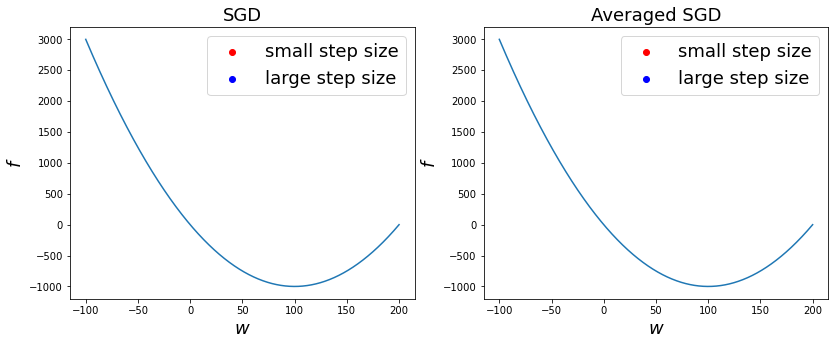

In [7]:
fig = plt.figure( figsize=(21,5) )
plt.rc('legend', fontsize=18)

#weights = 0.25 * np.ones_like(sgd_s_x)

ax = plt.subplot(1,3,1)
ax.set_xlabel("$w$", size=18)
ax.set_ylabel("$f$", size=18)

x = np.linspace(-100, 200, 1000)
y = utils.objective(x, config)

#plt.hist(sgd_s_x, range=(-5,5), bins=50, color='r', alpha=0.3, weights=weights)
#plt.hist(sgd_l_x, range=(-5,5), bins=50, color='b', alpha=0.3, weights=weights)
ax.scatter(sgd_s_x, utils.objective(sgd_s_x, config)+1, color='r', label='small step size')
ax.scatter(sgd_l_x, utils.objective(sgd_l_x, config), color='b', label='large step size')
ax.plot(x, y)
plt.title('SGD', size=18)
#plt.xlim(-100,100)
#plt.ylim(-1000,4000)
ax.legend(loc='upper right')

#-----
ax = plt.subplot(1,3,2)
ax.set_xlabel("$w$", size=18)
ax.set_ylabel("$f$", size=18)

x = np.linspace(-100, 200, 1000)
y = utils.objective(x, config)

#plt.hist(ave_sgd_s_x, range=(-5,5), bins=50, color='r', alpha=0.3, weights=weights)
#plt.hist(ave_sgd_l_x, range=(-5,5),  bins=50, color='b', alpha=0.3, weights=weights)
ax.scatter(ave_sgd_s_x, utils.objective(ave_sgd_s_x, config)+1, color='r', label='small step size')
ax.scatter(ave_sgd_l_x, utils.objective(ave_sgd_l_x, config), color='b', label='large step size')
ax.plot(x, y)
plt.title('Averaged SGD', size=18)
#plt.xlim(-100,100)
#plt.ylim(-1000,4000)
ax.legend(loc='upper right')

#fig.show()
fig.savefig('alg_comparison.png', bbox_inches='tight')

/var/folders/42/_8jtb5594rddnjmwctnf_xzm0000gn/T/ipykernel_66468/565194986.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


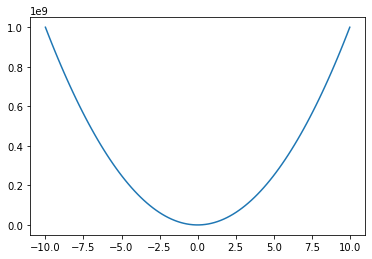

In [8]:
y = np.linspace(-10, 10, 100)
z = utils.c(0)*y**2

plt.scatter(sgd_s_y, utils.objective(sgd_s_y, config)+1, color='r', label='small step size')
plt.scatter(sgd_l_y, utils.objective(sgd_l_y, config), color='b', label='large step size')
plt.plot(y, z)
fig.show()